In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.tree import export_graphviz

# 나무구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

# 최적모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV


# 회귀분석
import statsmodels.formula.api as smf

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor as RFR

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR

#평가함수 2개 MSE, MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 시간 자료를 핸들링 할 수 있는 라이브러리
import datetime as dt

# 회귀분석
from statsmodels.formula.api import ols

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 회귀계수들의 Scale 변환 -> 표준화 회귀계수 산출. 이건 coef가 곧 weight 값이 되는데, scale이 큰 놈들에게 coef 영향이 커지기 때문에, 이러한 경우 스케일 조정이 필요하다. 하지만 여기서 할 필요는 없다.
from sklearn.preprocessing import StandardScaler

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

# 나무구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

# 최적모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV


# 회귀분석
import statsmodels.formula.api as smf

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor as RFR

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR

#평가함수 2개 MSE, MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scale 변환
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA

#회귀분석
import statsmodels.api as sm


import warnings
warnings.filterwarnings(action='ignore')


matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

# 데이터 구성:Series, DataFrame
import pandas as pd

import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 로지스틱 회귀
from statsmodels.api import Logit
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE


# Check the Frequency of Variable
from collections import Counter

In [2]:
df_raw_booking = pd.read_csv('./data_folder/refined_book_data3.csv')
df_raw_booking.head(1)

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days
0,A,20151214,441,SI0298,sc600,16A01039,5,5.0,3630.0,16500.0,1650,Y,20151215,1 days


In [3]:
df_raw_cooking = pd.read_csv('./data_folder/refined_Cooking_Data.csv')
df_raw_cooking.head(1)

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산일자,쿠킹-실링
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,2021-01-03,34.97215


In [4]:
df_raw_menu = pd.read_csv('./data_folder/Product_Name.csv')
df_raw_menu.head(2)

,품목코드,품목명,평균수주단가,Column 4
0,NaN,NaN,NaN,NaN
1,1.#JE+00,가쓰오다시국물900ml,NaN,NaN


In [5]:
df_raw_error = pd.read_csv('./data_folder/Error_Message.csv')
df_raw_error.head(1)

,순번,생산라인코드,생산라인명,품목코드,품목명,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,생산일자
0,10,D004,PET병,13D02080,참깨흑임자드레싱,14:16,14:24,8,W0056B4,위치조정실패,충전실,2021-01-03


In [6]:
df_raw_booking['diff_kg'] = df_raw_booking['출고수량KG'] - df_raw_booking['수주수량KG']

In [7]:
df_raw_booking['diff_days'] = df_raw_booking['납기일자'] - df_raw_booking['수주일자']

In [8]:
condition = (df_raw_booking['diff_kg'] < 0)
len(df_raw_booking[condition]) / len(df_raw_booking)

0.10184835774104123

In [9]:
condition = (df_raw_booking['diff_kg'] > 0)
len(df_raw_booking[condition]) / len(df_raw_booking)

0.01632038684644673

    납기량을 초과한 경우(출고수량-수주수량 > 0) 전체 납기의 1.6% 이며,
    납기량을 미달한 경우(출고수량-수주수량 < 0) 전체 납기의 10.2% 다.
    
    그렇다면 초과 납기의 경우 초과납기수량은 어느정도이며,
    미달 납기의 경우 미달납기수량은 어느정도일까?
    
    Why? 초과납기량이 많지 않다면, 1.6% 수준의 초과납기분은 큰 문제가 아님.
    반면 미달납기량이 많다면, 10.2% 수준의 미달납기는 매출에 큰 문제.

In [10]:
over_delivery = df_raw_booking[df_raw_booking['diff_kg'] > 0]
under_delivery = df_raw_booking[df_raw_booking['diff_kg'] < 0]

In [11]:
over_delivery[['diff_kg']].describe()

,diff_kg
count,2.698700e+04
mean,2.108236e+02
std,3.288436e+03
min,7.105427e-15
25%,1.200000e+01
50%,4.500000e+01
75%,1.320000e+02
max,5.226160e+05


<AxesSubplot:xlabel='수주품목코드'>

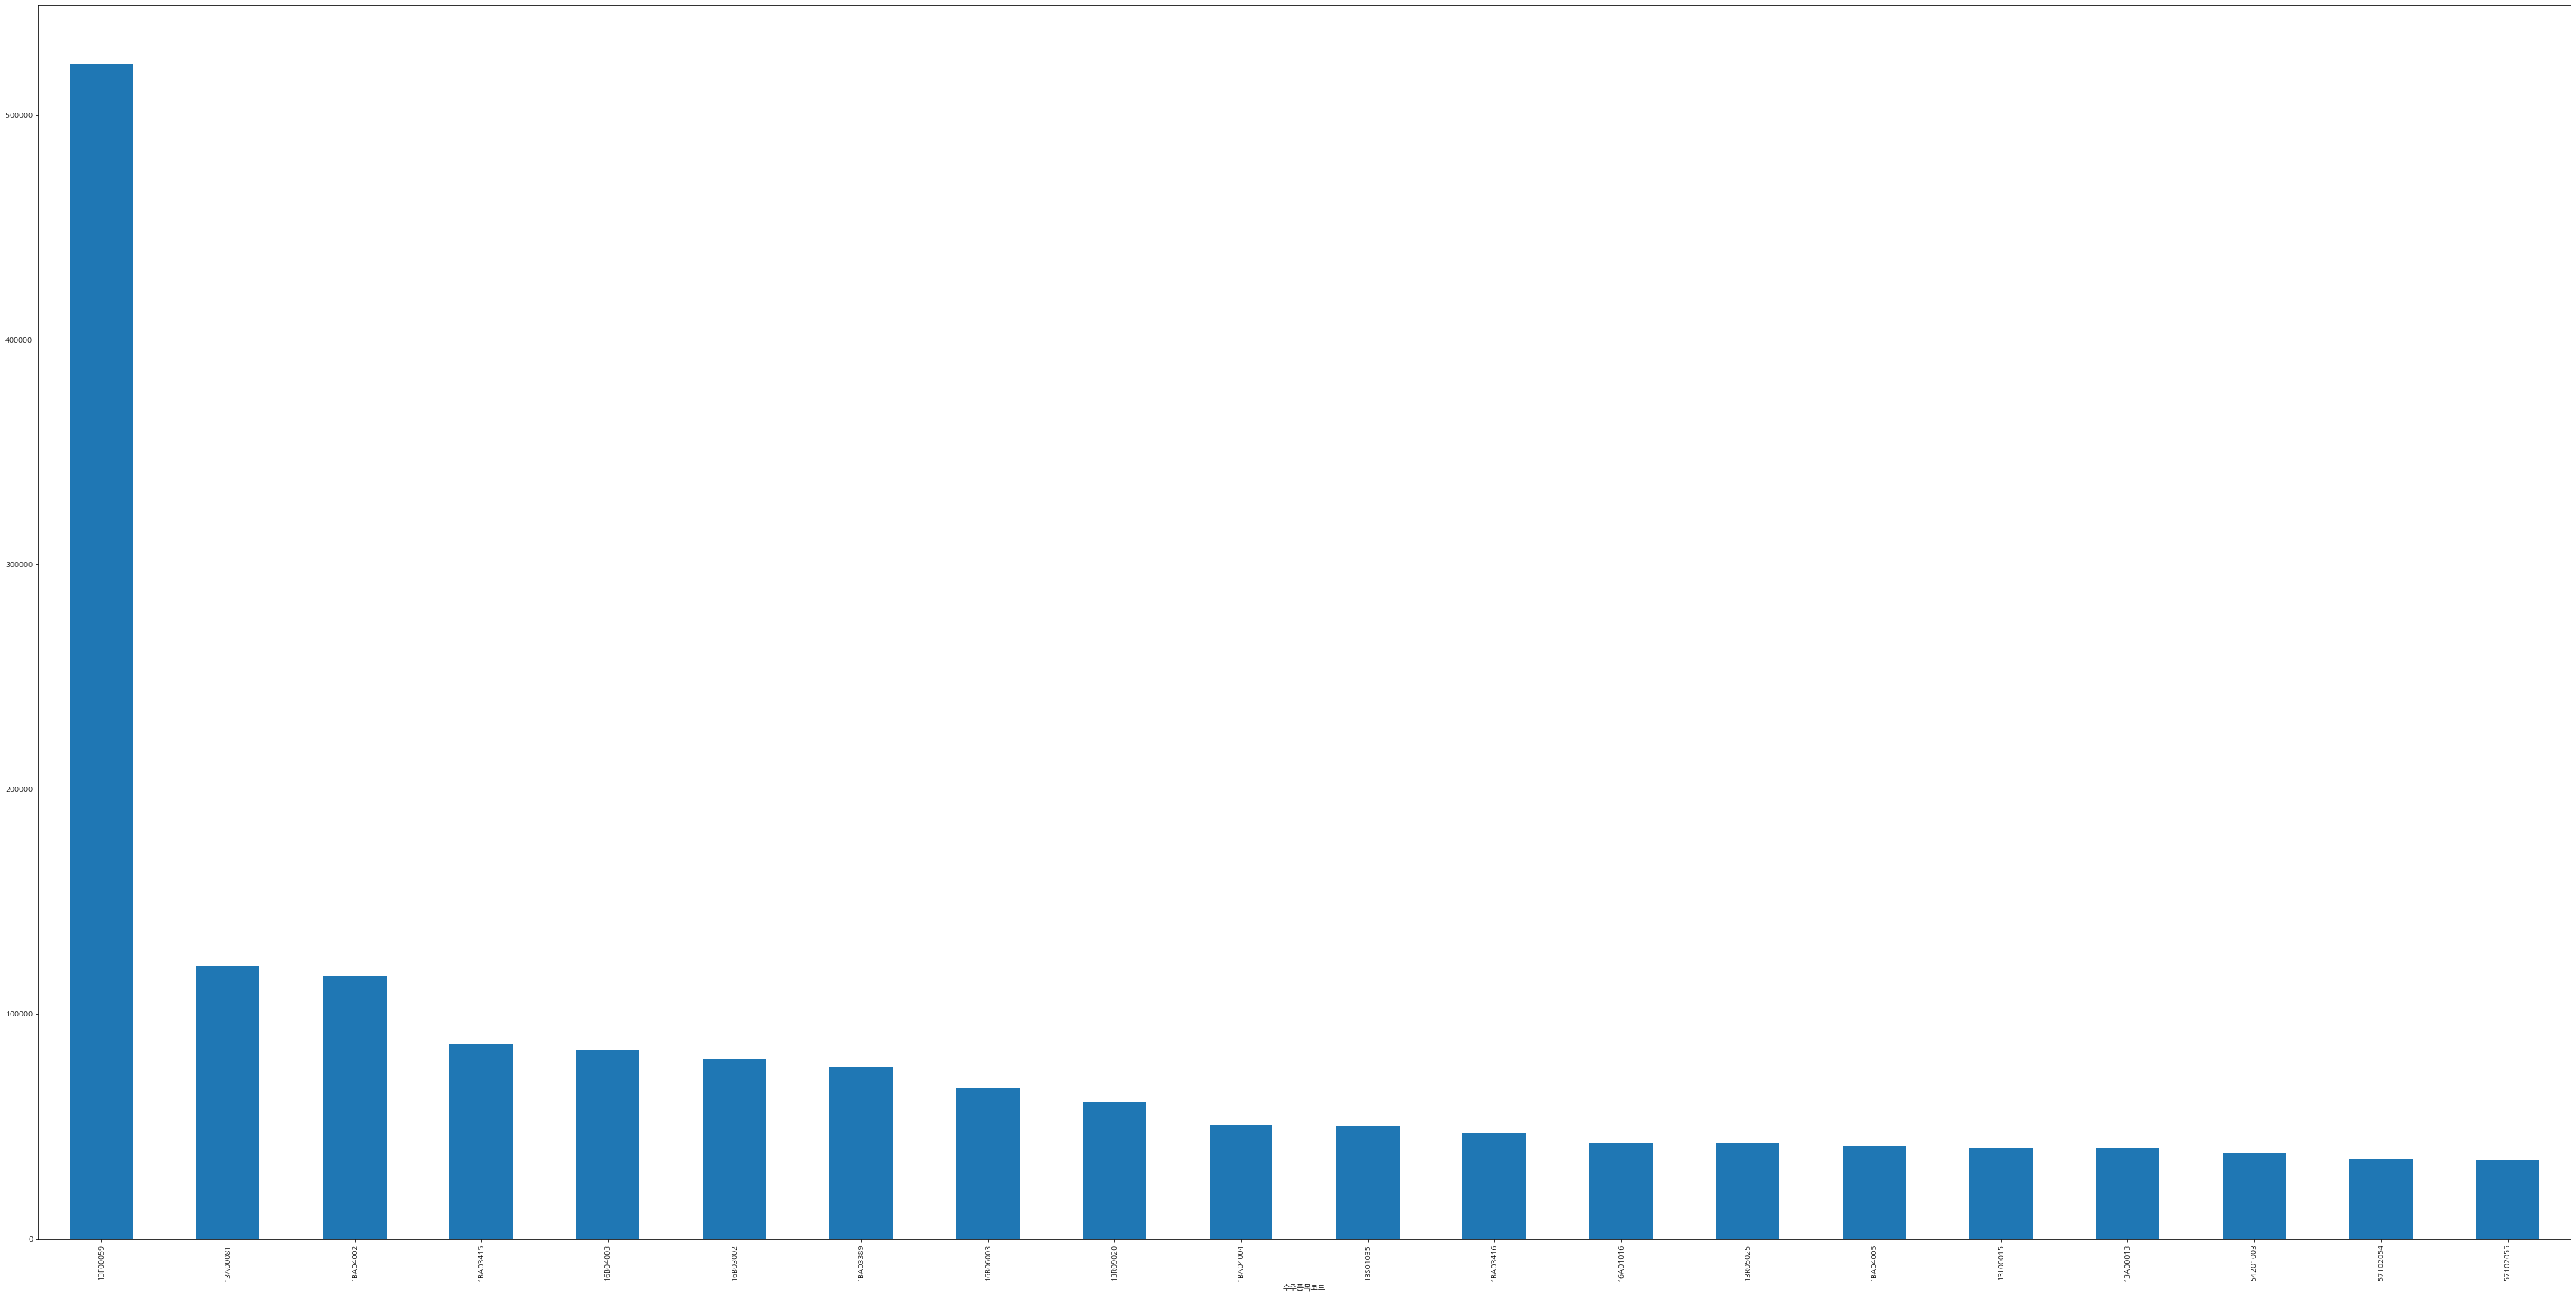

In [15]:
df1 = over_delivery.groupby(by='수주품목코드')["diff_kg"].sum().sort_values(ascending = False)
df1.head(20).plot.bar(figsize = (60, 30))

In [18]:
df1

수주품목코드
13F00059    522616.000
13A00081    121453.000
1BA04002    116848.000
1BA03415     86923.000
16B04003     84245.000
               ...    
13F03003         1.000
16A02002         1.000
1C106001         1.000
14101013         1.000
54101271         0.527
Name: diff_kg, Length: 2983, dtype: float64

In [22]:
print(len(df1))

2983


    독보적인 13F00059 품목에 대해 조회해보자.

In [23]:
df_raw_menu[df_raw_menu['품목코드'] == '13F00059']

,품목코드,품목명,평균수주단가,Column 4


    품목이 조회가 안된다. 품목명에 대해 정보가 있는 에러메세지 데이터셋에서 한 번 더 조회해보자.

In [24]:
df_raw_error[df_raw_error['품목코드'] == '13F00059']

,순번,생산라인코드,생산라인명,품목코드,품목명,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,생산일자


    안나온다. 해당 데이터를 조회해보고 이상치를 판별해보자.

In [25]:
df_raw_booking[df_raw_booking['수주품목코드'] == '13F00059'].sort_values(by = 'diff_kg')

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days,diff_kg
242050,C,20110318,111,IJ2772,202,13F00059,0,544.0,2051.0,2375058.0,237506,Y,20110319,1,-544.0
250544,C,20110510,21,IJ2772,202,13F00059,0,449.0,2051.0,1960756.0,196076,Y,20110510,0,-449.0
221813,C,20101104,94,IJ2772,500,13F00059,0,355.0,2051.0,1548505.0,154851,Y,20101105,1,-355.0
243990,C,20110330,200,IJ2772,202,13F00059,0,340.0,2051.0,1482873.0,148287,Y,20110331,1,-340.0
251242,C,20110514,23,IJ2772,202,13F00059,0,300.0,2051.0,1308538.0,130854,Y,20110515,1,-300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214156,C,20100911,19,IJ2772,202,13F00059,90,90.0,2051.0,393792.0,39379,Y,20100912,1,0.0
214232,C,20100912,19,IJ2772,500,13F00059,113,113.0,2051.0,492240.0,49224,Y,20100913,1,0.0
213424,C,20100906,213,IJ2772,500,13F00059,56,56.0,2051.0,246120.0,24612,Y,20100907,1,0.0
257434,C,20110621,73,IJ2772,202,13F00059,68,68.0,2051.0,295344.0,29534,Y,20110622,1,0.0


In [26]:
over_delivery[over_delivery['수주품목코드'] == '13F00059']

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days,diff_kg
238857,C,20110228,146,IJ2772,202,13F00059,522729,113.0,2051.0,492240.0,49224,Y,20110301,73,522616.0


    booking data와 종합적으로 고려해 출고수량에 대한 오기임을 알 수 있다.
    1) 다른 나머지 품목에 대해서도 이러한 오기가 존재할 가능성이 크다.
    2) 나머지 초과납기분도 14년도부터 모든 수주량에서 큰 손실이라 보기 어렵다.
    3) 초과납기분의 경우, 특정 프랜차이즈 업체(단일거래처)에만 납품하는 품목일 듯 하다. 이상치 제거 후 초과납기분 1위가 비비큐에 납품하는 소스기 때문. 후순위 품목들 또한 조회되지 않지만 지속적으로 초과납기분이 발생하며 품목이 조회되지 않는 것을 보아(아래에 다룸) 단일납품처일 가능성이 높다.
    -> 개선방안: 생산관리자에게 납기량에 딱 맞춰 주도록 문책 정도로 마무리.

In [27]:
df_raw_menu[df_raw_menu['품목코드'] == '13A00081']

,품목코드,품목명,평균수주단가,Column 4
13,13A00081,비비큐소스,6252.716049,NaN


In [28]:
over_delivery[over_delivery['수주품목코드'] == '13A00081']

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days,diff_kg
15134,C,20050831,22,IJ1977,SU0002,13A00081,8695,7400.0,1420.0,10508000.0,1050800,Y,20050926,95,1295.0
65106,C,20070518,46,IJ1977,400,13A00081,6730,6475.0,5254.0,9194500.0,3401965,Y,20070607,89,255.0
76425,C,20070731,18,IJ1977,400,13A00081,8436,8325.0,5254.0,11821500.0,4373955,Y,20070823,92,111.0
203521,C,20100702,58,IJ1977,500,13A00081,17094,15725.0,6990.0,29707500.0,0,Y,20100726,24,1369.0
254641,C,20110603,51,IJ1977,202,13A00081,9213,8936.0,6990.0,62459145.0,0,Y,20110707,104,277.0
268593,C,20110811,12,IJ1977,400,13A00081,11674,11100.0,6990.0,20970000.0,0,Y,20110825,14,574.0
278313,C,20110927,33,IJ1977,202,13A00081,8806,8788.0,7360.0,17480000.0,0,Y,20111014,87,18.0
283785,C,20111027,10,IJ1977,400,13A00081,11766,11100.0,7360.0,22080000.0,0,Y,20111110,83,666.0
291887,C,20111207,17,IJ1977,202,13A00081,9694,8325.0,7360.0,61272000.0,1656000,Y,20111216,9,1369.0
303535,C,20120202,193,IJ1977,202,13A00081,7715,7585.0,7360.0,15088000.0,0,Y,20120214,12,130.0


In [29]:
df_raw_menu[df_raw_menu['품목코드'] == '1BA04002']

,품목코드,품목명,평균수주단가,Column 4


In [30]:
over_delivery[over_delivery['수주품목코드'] == '1BA04002']

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days,diff_kg
347321,C,20160104,271,IK0128,400,1BA04002,18240,15200.0,1200.0,18240000.0,0,Y,20160119,15,3040.0
538134,C,20140618,104,IJ9513,400,1BA04002,18240,15200.0,1250.0,19000000.0,0,Y,20140626,8,3040.0
538137,C,20140618,107,IJ9513,400,1BA04002,18240,15200.0,1250.0,19000000.0,0,Y,20140718,100,3040.0
538351,C,20140618,297,IJ9513,400,1BA04002,17760,14800.0,1250.0,18500000.0,0,Y,20140808,190,2960.0
556049,C,20160115,28,IK0128,400,1BA04002,17664,14720.0,1200.0,17664000.0,0,Y,20160205,90,2944.0
563734,C,20140905,115,IJ9513,400,1BA04002,17088,14400.0,1250.0,18000000.0,0,Y,20140916,11,2688.0
567103,C,20140918,9,IJ9513,400,1BA04002,17760,14808.0,1250.0,18510000.0,0,Y,20141002,84,2952.0
576771,C,20141017,114,IJ9513,400,1BA04002,18240,15200.0,1250.0,19000000.0,0,Y,20141031,14,3040.0
582473,C,20141105,130,IJ9513,400,1BA04002,17280,14400.0,1250.0,18000000.0,0,Y,20141118,13,2880.0
586584,C,20141120,126,IJ9513,400,1BA04002,17760,14800.0,1250.0,18500000.0,0,Y,20141209,89,2960.0


In [31]:
over_delivery[over_delivery['수주품목코드'] == '1BA03415']

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days,diff_kg
1180499,C,20190331,336,IO976,406,1BA03415,302,144.0,8930.0,6.123429e+05,61234,Y,20190331,0,158.0
1205309,C,20190429,799,IO976,406,1BA03415,302,144.0,8930.0,6.123429e+05,61234,Y,20190430,1,158.0
1205474,C,20190513,444,IO976,406,1BA03415,479,13.0,8930.0,5.358000e+04,5358,Y,20190515,2,466.0
1223973,C,20200428,648,IO976,400,1BA03415,4687,2952.0,8930.0,1.255303e+07,1255303,Y,20200430,2,1735.0
1261561,C,20190829,523,IO976,406,1BA03415,2570,1.0,8930.0,4.252377e+03,425,Y,20190831,2,2569.0
1276725,C,20191008,469,IO976,202,1BA03415,1273,1058.0,8930.0,4.500720e+06,450072,Y,20191009,1,215.0
1279059,C,20190930,925,IO976,406,1BA03415,22781,600.0,8930.0,2.551429e+06,255143,Y,20190930,0,22181.0
1286410,C,20191023,439,IO976,202,1BA03415,2138,1814.0,8930.0,7.715520e+06,771552,Y,20191024,1,324.0
1296999,C,20191029,563,IO976,406,1BA03415,1153,549.0,8930.0,2.334557e+06,233456,Y,20191031,2,604.0
1306378,C,20191126,166,IO976,406,1BA03415,806,64.0,8930.0,2.721524e+05,27215,Y,20191126,0,742.0


    이제 미달 납기를 보도록 하자.

<AxesSubplot:xlabel='수주품목코드'>

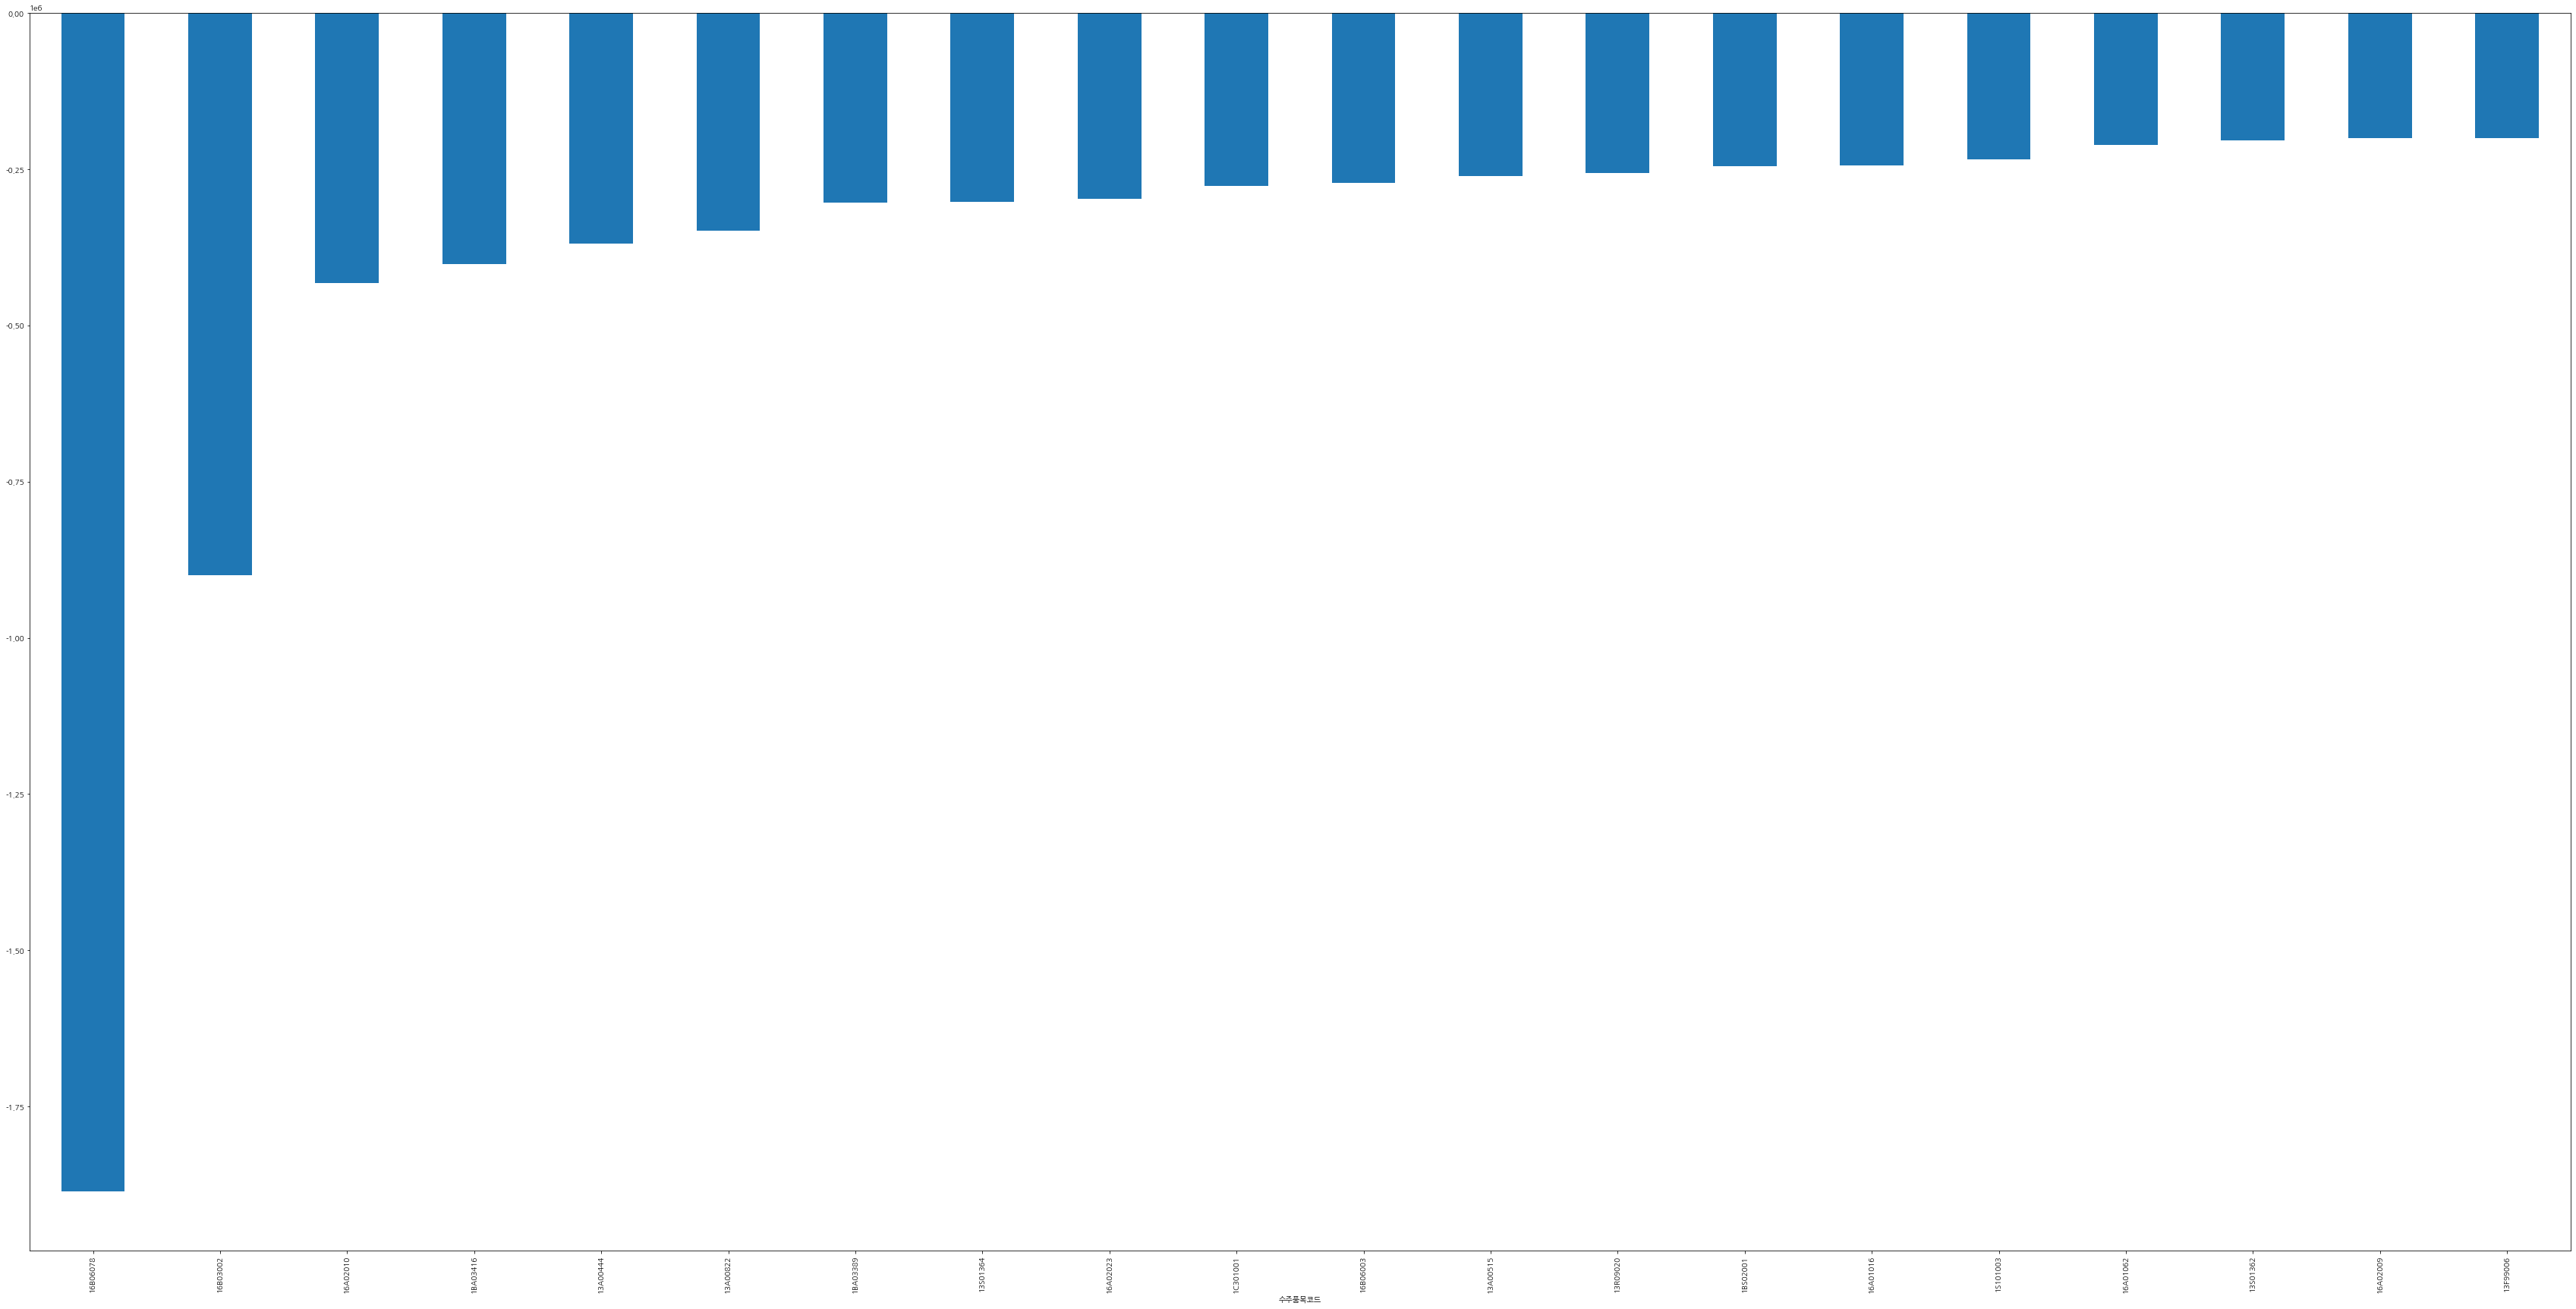

In [32]:
df1 = under_delivery.groupby(by='수주품목코드')["diff_kg"].sum().sort_values(ascending = True)
df1.head(20).plot.bar(figsize = (60, 30))

In [33]:
# 미달납기 품목 수에 대한 조회. 품목별로 sum을 했기 때문에 데이터프레임이 품목수 길이만큼 되는 것.
# 미달납기 횟수가 초과납기의 8배임에도 품목 수는 1.5배 정도밖에 되지 않는다.
# 일부 품목에 미달분이 편중되어 존재할 것이라는 추정이 가능하다.
print(len(df1))

4094


In [34]:
df_raw_menu[df_raw_menu['품목코드'] == '16B06078']

,품목코드,품목명,평균수주단가,Column 4


In [35]:
under_delivery[under_delivery['수주품목코드'] == '16B06078']

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days,diff_kg
12346,C,20180124,96,FJ0004,400,16B06078,60,4000.0,73.50,294000.0,0,Y,20180208,84,-3940.0
19518,C,20151218,36,FJ0004,400,16B06078,750,50000.0,71.00,3550000.0,0,Y,20160204,8986,-49250.0
48486,C,20170929,83,FJ0004,400,16B06078,1071,71000.0,88.00,6248000.0,0,Y,20171030,101,-69929.0
65599,C,20151217,97,FJ0004,400,16B06078,1080,72000.0,71.00,5112000.0,0,Y,20160118,8901,-70920.0
129799,C,20180130,55,FJ0004,400,16B06078,708,46600.0,73.50,3425100.0,0,Y,20180226,96,-45892.0
167101,C,20170816,317,FJ0004,400,16B06078,69,4000.0,71.00,284000.0,0,Y,20170907,91,-3931.0
194618,C,20180323,155,FJ0004,400,16B06078,9,600.0,73.50,44100.0,0,Y,20180424,101,-591.0
194620,C,20180323,157,FJ0004,400,16B06078,1452,96800.0,73.50,7114800.0,0,Y,20180424,101,-95348.0
293042,C,20180110,216,FJ0004,400,16B06078,1632,97600.0,73.50,7173600.0,0,Y,20180122,12,-95968.0
465750,C,20171208,282,FJ0004,400,16B06078,861,56800.0,73.50,4174800.0,0,Y,20180108,8900,-55939.0


    해당 품목이 무엇인지는 모르나, 지속적으로 엄청난 납기 미달 수량이 발생한다.
    해당 품목의 납기 미달 기록 원인을 조사하여,
    1) 납기 기록 관리자의 잘못일 경우 -> 해고 및 문책, 수불관리대장 재교육 등.
    2) 미달 납기가 사실일 경우 -> 생산 예측이 필요. -> 시계열 예측 모델의 필요성.

In [36]:
df_raw_menu[df_raw_menu['품목코드'] == '16A02010']

,품목코드,품목명,평균수주단가,Column 4
775,16A02010,시아스단호박샐러드,2941.414401,NaN


In [37]:
under_delivery[under_delivery['수주품목코드'] == '16A02010']

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days,diff_kg
163499,C,20090824,21,IJ2223,400,16A02010,100,120.0,3000.0,360000.0,36000,Y,20090825,1,-20.0
163786,C,20090826,21,IJ2078,400,16A02010,2650,3000.0,3300.0,9900000.0,990000,Y,20090903,77,-350.0
164552,C,20090901,130,IJ2023,400,16A02010,2,61.0,3000.0,183000.0,18300,Y,20090903,2,-59.0
164701,C,20090903,27,IJ2078,400,16A02010,1800,2000.0,3300.0,6600000.0,660000,Y,20090911,8,-200.0
165384,C,20090909,31,IJ2078,400,16A02010,2600,3000.0,3300.0,9900000.0,990000,Y,20090917,8,-400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047829,A,20180612,109,IJ1693,200,16A02010,0,150.0,3628.0,494728.0,49472,Y,20180613,1,-150.0
1215674,C,20190605,449,IJ9455,202,16A02010,0,30.0,2871.0,86130.0,8613,Y,20190606,1,-30.0
1288630,C,20191028,674,IJ9455,202,16A02010,0,20.0,2871.0,57420.0,5742,Y,20191029,1,-20.0
1410382,A,20200701,82,SI3104,NaN,16A02010,0,80.0,3550.0,258182.0,25818,Y,20200702,1,-80.0


    시아스 단호박샐러드가 지속적으로 납기량을 맞추지 못하는 모습을 볼 수 있다.
    따라서 이러한 품목들에 대해 예측 생산을 진행, 1일 이내 납기를 마칠 수 있도록 해야한다.

# "시아스단호박샐러드" 수주예측을 위한 시계열 예측 모델

In [38]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import scipy.stats as stats

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

mpl.rc('font',family='NanumGothic')

import statsmodels.api as sm 
import warnings 
import itertools
from pylab import rcParams

In [39]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [40]:
df_series = pd.merge(df_raw_booking,
                     df_raw_menu.rename(columns={'품목코드':'수주품목코드'})
                     , on= '수주품목코드', how= 'left')

In [41]:
# 수주 일자에 포함된 0 값 제거 
cond1 = (df_raw_booking['수주일자'] == 0)|(df_raw_booking['납기일자'] == 0) 
cond2 = (df_raw_booking['납기일자'] == '2015-02-')|(df_raw_booking['납기일자'] == 19000100)|(df_raw_booking['납기일자'] == 43470725)|\
        (df_raw_booking['납기일자'] == '2018-05-')|(df_raw_booking['납기일자'] == '6월 5일')|(df_raw_booking['납기일자'] == '6월 12일')|\
        (df_raw_booking['납기일자'] == '2018-061')|(df_raw_booking['납기일자'] == '43616')|(df_raw_booking['납기일자'] == '30180430')

df_series.loc[cond1|cond2]

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,diff_days,diff_kg,품목명,평균수주단가,Column 4


In [42]:
df1 = pd.read_csv('./data_folder/Booking_data.csv')
df2 = pd.read_csv('./data_folder/Cooking_Data.csv')
df3 = pd.read_csv('./data_folder/Error_Message.csv')
df4 = pd.read_csv('./data_folder/Product_Name.csv')

In [43]:
df1_clean0 = pd.merge(df1, df4.rename(columns={'품목코드':'수주품목코드'})
                      , on='수주품목코드', how='left')

In [44]:
df1_clean0_pivot = df1_clean0.pivot_table(index='품목명', values='수주금액', aggfunc='sum').reset_index()
df1_clean0_pivot.sort_values(by='수주금액',ascending=False).head(20)

,품목명,수주금액
344,마요네즈-업소용10kg,1.428998e+10
656,시아스단호박샐러드,1.184885e+10
209,골드마요네즈3.2kg,1.104477e+10
426,미스터피자살사소스엠피,9.877121e+09
422,미스터피자단호박샐러드,8.407089e+09
121,NEW단호박샐러드-1,8.062387e+09
1130,해표골드마요네즈,7.897138e+09
985,치즈소스-BK,7.326641e+09
623,쉐프솔루션베이스볶음밥(시즌)500g,6.908628e+09
880,이츠웰골드마요네즈3.2kg,6.044347e+09


In [45]:
# 수주 일자에 포함된 0 값 제거 
cond1 = (df1_clean0['수주일자'] == 0)|(df1_clean0['납기일자'] == 0) 
cond2 = (df1_clean0['납기일자'] == '2015-02-')|(df1_clean0['납기일자'] == 19000100)|(df1_clean0['납기일자'] == 43470725)|\
        (df1_clean0['납기일자'] == '2018-05-')|(df1_clean0['납기일자'] == '6월 5일')|(df1_clean0['납기일자'] == '6월 12일')|\
        (df1_clean0['납기일자'] == '2018-061')|(df1_clean0['납기일자'] == '43616')|(df1_clean0['납기일자'] == '30180430')

df1_clean0.loc[cond1|cond2]

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,품목명,평균수주단가,Column 4
290056,C,20111128,62,IJ3094,202,13K02080,240,240,3300.0,792000.0,39600,Y,19000100,시아스살사소스,5303.130503,NaN
290818,C,20111201,86,IJ3160,202,13K02080,36,36,3250.0,117000.0,5850,Y,19000100,시아스살사소스,5303.130503,NaN
290819,C,20111201,87,IJ3160,202,13D08030,120,120,2850.0,342000.0,17100,Y,19000100,시아스칠리소스2kg,4112.129662,NaN
290820,C,20111201,88,IJ3160,202,13K01115,36,36,2750.0,99000.0,4950,Y,19000100,시아스핫칠리소스,4345.622956,NaN
290821,C,20111201,89,IJ3160,202,13D04105,96,96,3550.0,340800.0,17040,Y,19000100,요거트드레싱골드,5259.027064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115367,C,20200329,27,IK0299,400,13K03132,0,144,3400.0,489600.0,16320,Y,19000100,어니언크림소스-S,3539.990826,NaN
1115368,C,20200329,28,IK0299,400,13R11041,0,228,2700.0,615600.0,20520,Y,19000100,촉촉한스테이크소스,2466.172680,NaN
1115369,C,20200329,29,IK0299,400,16A03024,0,360,4450.0,1602000.0,160200,Y,19000100,NaN,NaN,NaN
1115370,C,20200329,30,IK0299,400,16A03020,0,20,4200.0,84000.0,8400,Y,19000100,콘치즈샐러드,3789.732715,NaN


In [46]:
df1_clean1 = df1_clean0.loc[~(cond1|cond2)]
df1_clean2 = df1_clean1.drop(columns=['Column 4']).dropna()
df1_clean2['납기일자(int)'] = df1_clean2['납기일자'].astype(int)

cond0 = (df1_clean2['납기일자(int)']<20220000)
cond1 = (df1_clean2['납기일자(int)']>20100000)
df1_clean3 = df1_clean2.loc[cond0&cond1]

df1_clean3['수주일자(clean)'] = pd.to_datetime(df1_clean3['수주일자'],format='%Y%m%d')
df1_clean3['납기일자(clean)'] = pd.to_datetime(df1_clean3['납기일자'],format='%Y%m%d')

In [47]:
df1_clean3[['수주일자(clean)','납기일자(clean)']].describe()

,수주일자(clean),납기일자(clean)
count,979677,979677
unique,4288,4324
top,2020-08-18 00:00:00,2018-10-31 00:00:00
freq,1205,893
first,2009-12-15 00:00:00,2010-01-01 00:00:00
last,2021-11-30 00:00:00,2021-12-31 00:00:00


In [48]:
df1_clean3['생산기간'] = df1_clean3['납기일자(clean)'] - df1_clean3['수주일자(clean)']

def func2(row):
    result = str(row).split(' ')[0]
    return int(result) 

df1_clean3['생산기간(int)'] = df1_clean3['생산기간'].apply(func2)

In [49]:
cond1 = (df1_clean3['생산기간(int)'] > 0)
df1_clean3_pivot0 = df1_clean3.loc[cond1].pivot_table(index='품목명',values='생산기간(int)').reset_index()
df1_clean3_pivot0.sort_values(by='생산기간(int)',ascending=False).head(10)

,품목명,생산기간(int)
814,요리하다오징어김치볶음밥,361.000000
815,요리하다제육볶음밥,361.000000
834,유자마요네즈500g,85.000000
833,유자마요네즈290g,85.000000
102,Homeplus signature 새우볶음밥,74.800000
97,G-price마요네즈500g,71.666667
61,1974새우볶음밥240g,39.421053
898,정성담은발사믹드레싱(245g),35.363636
299,디프라이스마요네즈-1 1kg,32.056604
301,디프라이스마요네즈튜브,27.636364


In [50]:
top_list = df1_clean0_pivot.sort_values(by='수주금액',ascending=False).head(20)['품목명'].values.tolist()

In [51]:
# 주요 품목에 대한 납품기간 추이 
def func1(data):
    if data in top_list :
        return True
    else:
        return False
    
df1_clean3_pivot01 = df1_clean3_pivot0.loc[(df1_clean3_pivot0['품목명'].apply(func1))]
df1_clean3_pivot01

,품목명,생산기간(int)
117,NEW단호박샐러드-1,1.225417
204,골드마요네즈3.2kg,1.970006
336,마요네즈-업소용10kg,1.914192
412,미스터피자고구마샐러드엠피,5.911061
413,미스터피자단호박샐러드,6.063567
417,미스터피자살사소스엠피,6.031156
420,미스터피자피자소스엠피,6.075610
482,"비비고낙지비빔밥(밥,낙지비빔양념장)",1.403153
488,"비비고불고기비빔밥(밥,참기름)",1.421053
515,빠네크림소스T,1.071795


In [52]:
df1_clean3_pivot = df1_clean3.pivot_table(index=['수주일자(clean)','품목명'],
                                          values='수주금액').reset_index()

In [53]:
df1_clean3_pivot

,수주일자(clean),품목명,수주금액
0,2009-12-15,요리愛[애]사우전아일랜드드레싱,8345600.0
1,2009-12-24,PALAMA KALBI SAUCE,25410000.0
2,2009-12-24,감자샐러드-P,6900000.0
3,2009-12-24,골드마요네즈3.2kg,126000.0
4,2009-12-24,구터스마요네즈골드1kg,3444726.0
...,...,...,...
451128,2021-11-03,바른선유정란마요네즈3kg(부스터사용),672500.0
451129,2021-11-09,마요네즈-P(현미유)/국산난황-판매용,2008800.0
451130,2021-11-16,마요네즈-P(현미유)/국산난황-판매용,2008800.0
451131,2021-11-23,마요네즈-P(현미유)/국산난황-판매용,2008800.0


In [54]:
cond1 = df1_clean3_pivot['품목명'].str.contains('시아스단호박샐러드')
data1 = df1_clean3_pivot.loc[cond1][['수주일자(clean)','수주금액']].set_index('수주일자(clean)')

In [55]:
data1

,수주금액
수주일자(clean),
2009-12-24,6675000.0
2009-12-31,6660000.0
2010-01-02,51000.0
2010-01-03,27000.0
2010-01-04,596000.0
...,...
2020-05-04,279000.0
2020-05-11,341000.0
2020-05-14,620000.0


In [56]:
y = data1['수주금액'].resample('1W').mean().fillna(method='ffill')

In [57]:
y.head()

수주일자(clean)
2009-12-27    6.675000e+06
2010-01-03    2.246000e+06
2010-01-10    2.210833e+05
2010-01-17    7.597083e+05
2010-01-24    1.704929e+06
Freq: W-SUN, Name: 수주금액, dtype: float64

In [58]:
y.tail()

수주일자(clean)
2020-06-07    620000.0
2020-06-14    620000.0
2020-06-21    620000.0
2020-06-28    620000.0
2020-07-05    229680.0
Freq: W-SUN, Name: 수주금액, dtype: float64

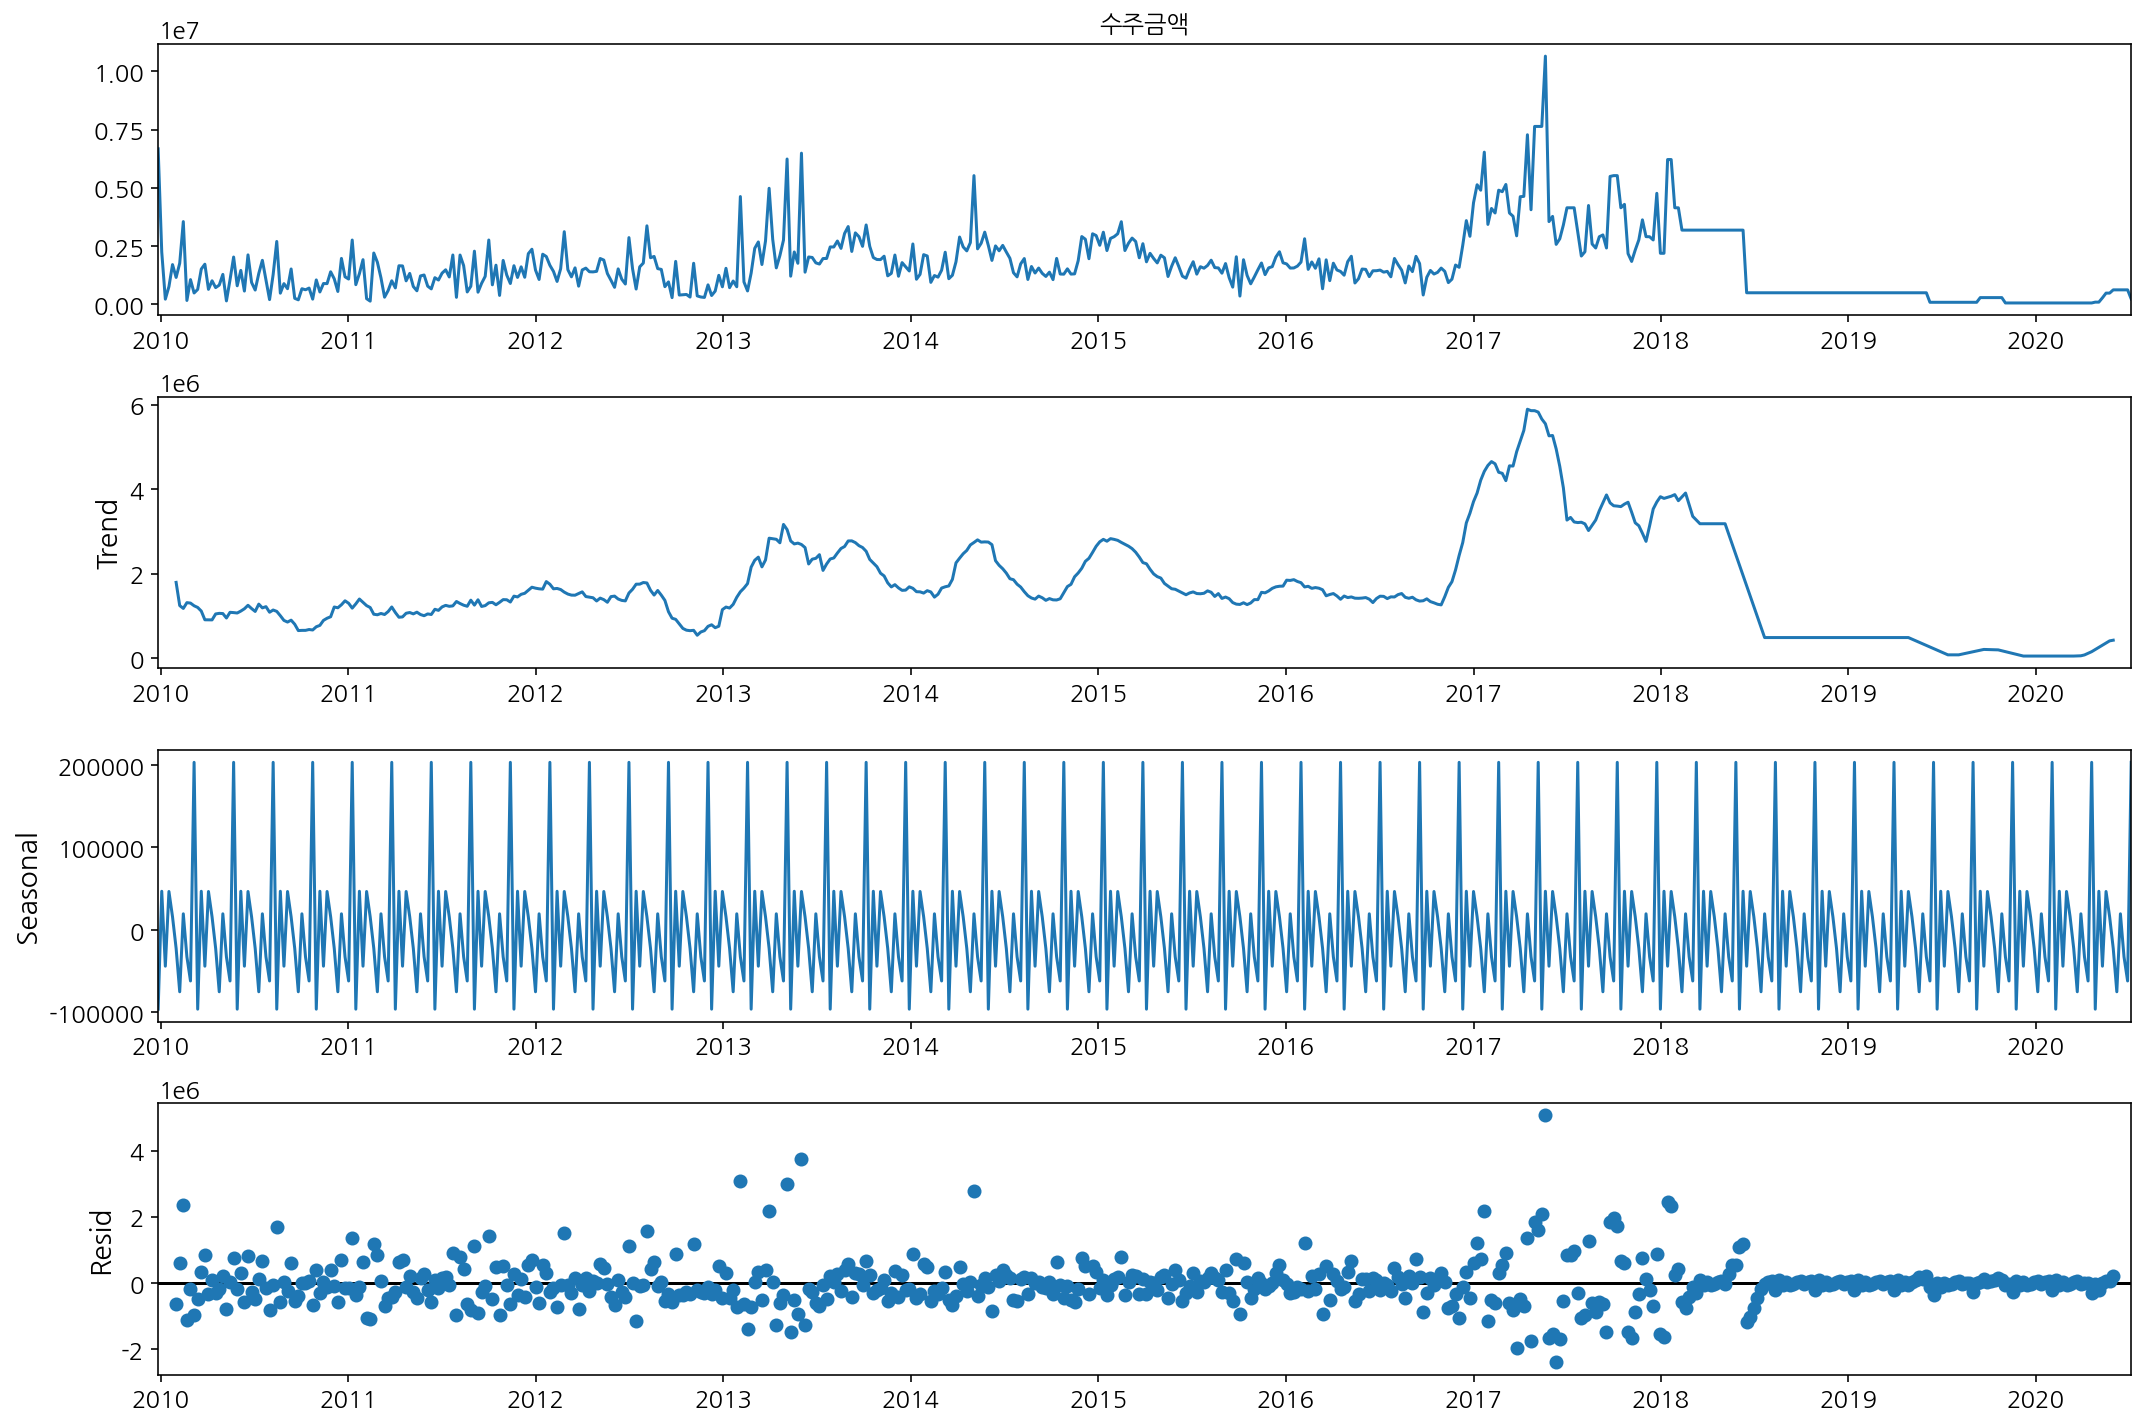

In [59]:
decomposition= sm.tsa.seasonal_decompose(y, freq= 11, model='additive')
fig = decomposition.plot()
plt.show()

In [60]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

param_list = []
param_seasonal_list = []
results_AIC_list = []

In [61]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59811D+01    |proj g|=  7.28301D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.283D-09   1.598D+01
  F =   15.981090273452196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51501D+01    |proj g|=  2.66451D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.665D-09   1.515D+01
  F =   15.150091077461495     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51362D+01    |proj g|=  1.48244D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.467D-05   1.514D+01
  F =   15.136240719021000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.47375D+01    |proj g|=  9.54577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   5.036D-07   1.474D+01
  F =   14.737457814000372     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57175D+01    |proj g|=  2.18835D-01


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      9      1     0     0   1.354D-06   1.570D+01
  F =   15.695675438379542     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52994D+01    |proj g|=  1.31505D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   6.217D-08   1.504D+01
  F =   15.044008179433229     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46236D+01    |proj g|=  6.99034D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52304D+01    |proj g|=  1.15174D-01

At iterate    5    f=  1.52243D+01    |proj g|=  3.67252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   1.552D-06   1.522D+01
  F =   15.224272024700390     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46265D+01    |proj g|=  6.94197D-02

At iterate    5    f=  1.46159D+01    |proj g|=  5.48073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     13      1     0     0   6.226D-07   1.462D+01
  F =   14.615882337795572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51583D+01    |proj g|=  3.23298D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.233D-08   1.516D+01
  F =   15.158268183320764     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45949D+01    |proj g|=  1.97977D-01

At iterate    5    f=  1.45688D+01    |proj g|=  6.87042D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     10      1     0     0   6.870D-06   1.457D+01
  F =   14.568815808448552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48136D+01    |proj g|=  3.98624D-02

At iterate    5    f=  1.48128D+01    |proj g|=  1.45590D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     10      1     0     0   1.456D-06   1.481D+01
  F =   14.812828693997831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at th

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46280D+01    |proj g|=  1.71082D-01

At iterate    5    f=  1.45644D+01    |proj g|=  2.34226D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     17      1     0     0   4.545D-06   1.456D+01
  F =   14.564358602829905     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   1.901D-07   1.498D+01
  F =   14.977121010622660     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46375D+01    |proj g|=  5.71809D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49559D+01    |proj g|=  1.73497D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   9.979D-06   1.496D+01
  F =   14.955751785972964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44539D+01    |proj g|=  1.48553D-01

At iterate    5    f=  1.44398D+01    |proj g|=  1.59718D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     10      1     0     0   1.597D-05   1.444D+01
  F =   14.439842547928910     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   9.743D-07   1.469D+01
  F =   14.689521309927958     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46368D+01    |proj g|=  5.81650D-02

At iterate    5    f=  1.46342D+01    |proj g|=  1.51626D-02

At iterate   10    f=  1.46337D+01    |proj g|=  6.90379D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45940D+01    |proj g|=  1.58334D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   8.704D-07   1.459D+01
  F =   14.593870862213361     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44813D+01    |proj g|=  1.4

 This problem is unconstrained.



At iterate    5    f=  1.44398D+01    |proj g|=  6.77476D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     16      1     0     0   1.690D-06   1.444D+01
  F =   14.439826645972767     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51719D+01    |proj g|=  2.56838D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   2.554D-05   1.517D+01
  F =   15.171900778367856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.4

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50189D+01    |proj g|=  6.56684D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.567D-06   1.502D+01
  F =   15.018893594597387     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.4

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.48131D+01    |proj g|=  3.91557D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   2.482D-07   1.481D+01
  F =   14.813080017623738     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48833D+01    |proj g|=  4.61964D-01

At iterate    5    f=  1.48182D+01    |proj g|=  2.22301D-02

At iterate   10    f=  1.48127D+01    |proj g|=  3.64119D-03

       

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   4.754D-07   1.461D+01
  F =   14.612203569780576     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45717D+01    |proj g|=  1.16470D-01


 This problem is unconstrained.



At iterate    5    f=  1.45455D+01    |proj g|=  2.63418D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   3.009D-07   1.455D+01
  F =   14.545522850448245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50257D+01    |proj g|=  1.97955D-01

At iterate    5    f=  1.50246D+01    |proj g|=  1.14965D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   2.215D-07   1.502D+01
  F =   15.024595912415636     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44820D+01    |proj g|=  1.63611D-01


 This problem is unconstrained.



At iterate    5    f=  1.44536D+01    |proj g|=  1.45931D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   5.791D-05   1.445D+01
  F =   14.453392380801125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49566D+01    |proj g|=  7.17918D-01

At iterate    5    f=  1.46982D+01    |proj g|=  1.13087D-01

At iterate   10    f=  1.46871D+01    |proj g|=  1.60554D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   2.976D-05   1.469D+01
  F =   14.687111682814455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  1.46614D+01    |proj g|=  4.70378D-02

At iterate   15    f=  1.46585D+01    |proj g|=  1.21624D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     24      1     0     0   1.634D-05   1.466D+01
  F =   14.658444069265862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45759D+01    |proj g|=  1.32012D-01


 This problem is unconstrained.



At iterate    5    f=  1.45655D+01    |proj g|=  4.17069D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   4.498D-07   1.457D+01
  F =   14.565477484908843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44862D+01    |proj g|=  1.62114D-01


 This problem is unconstrained.



At iterate    5    f=  1.44535D+01    |proj g|=  1.44224D-02

At iterate   10    f=  1.44534D+01    |proj g|=  1.65503D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     13      1     0     0   1.655D-06   1.445D+01
  F =   14.453386768133605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50696D+01    |proj g|=  6.16858D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45183D+01    |proj g|=  1.51047D-01

At iterate    5    f=  1.45015D+01    |proj g|=  2.03522D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     12      1     0     0   3.084D-07   1.450D+01
  F =   14.501548509602442     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   8.203D-07   1.471D+01
  F =   14.713269989671577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47126D+01    |proj g|=  4.55924D-02

At iterate    5    f=  1.47111D+01    |proj g|=  3.31218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   3.972D-06   1.460D+01
  F =   14.603928134870749     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45493D+01    |proj g|=  1.34813D-01


 This problem is unconstrained.



At iterate    5    f=  1.45012D+01    |proj g|=  5.65948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     21      1     0     0   8.688D-07   1.450D+01
  F =   14.501179466580876     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49779D+01    |proj g|=  3.20886D-02

At iterate    5    f=  1.49770D+01    |proj g|=  7.57616D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.46340D+01    |proj g|=  3.68570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   9.523D-06   1.463D+01
  F =   14.633953644831289     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49568D+01    |proj g|=  3.35326D-02

At iterate    5    f=  1.49557D+01    |proj g|=  4.68781D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.44395D+01    |proj g|=  8.15179D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     13      1     0     0   1.657D-06   1.444D+01
  F =   14.439479494572126     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46618D+01    |proj g|=  3.86496D-02

At iterate    5    f=  1.46612D+01    |proj g|=  1.42979D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   9.651D-06   1.466D+01
  F =   14.661212418466288     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46347D+01    |proj g|=  4.40775D-02

At iterate    5    f=  1.46331D+01    |proj g|=  5.89257D-03

At iterate   10    f=  1.46326D+01    |proj g|=  4.44158D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   2.654D-06   1.463D+01
  F =   14.632626958471800     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.45648D+01    |proj g|=  3.45773D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   1.065D-05   1.456D+01
  F =   14.564780061809405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44828D+01    |proj g|=  1.39725D-01


 This problem is unconstrained.



At iterate    5    f=  1.44395D+01    |proj g|=  8.81306D-03

At iterate   10    f=  1.44395D+01    |proj g|=  2.82340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     20      1     0     0   4.956D-07   1.444D+01
  F =   14.439461557212811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [62]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,
             'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [63]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
27,"(0, 1, 1)","(0, 1, 1, 12)",15889.826803
59,"(1, 1, 1)","(0, 1, 1, 12)",15891.427444
31,"(0, 1, 1)","(1, 1, 1, 12)",15891.809311
63,"(1, 1, 1)","(1, 1, 1, 12)",15893.407713
43,"(1, 0, 1)","(0, 1, 1, 12)",15906.731619
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",16820.161010
12,"(0, 0, 1)","(1, 0, 0, 12)",16831.452004
1,"(0, 0, 0)","(0, 0, 1, 12)",16964.837980
8,"(0, 0, 1)","(0, 0, 0, 12)",17269.242982


In [64]:
mod = sm.tsa.statespace.SARIMAX(y,
                                 order=(1, 0, 1),
                                 seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44820D+01    |proj g|=  1.63611D-01


 This problem is unconstrained.



At iterate    5    f=  1.44536D+01    |proj g|=  1.45931D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   5.791D-05   1.445D+01
  F =   14.453392380801125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9314      0.023     41.383      0.000       0.887       0.976
ma.L1         -0.5513      0.051    -10.775      0.000      -0.652      -0.451
ma.S.L12      -0.7292      0.023    -31.812  

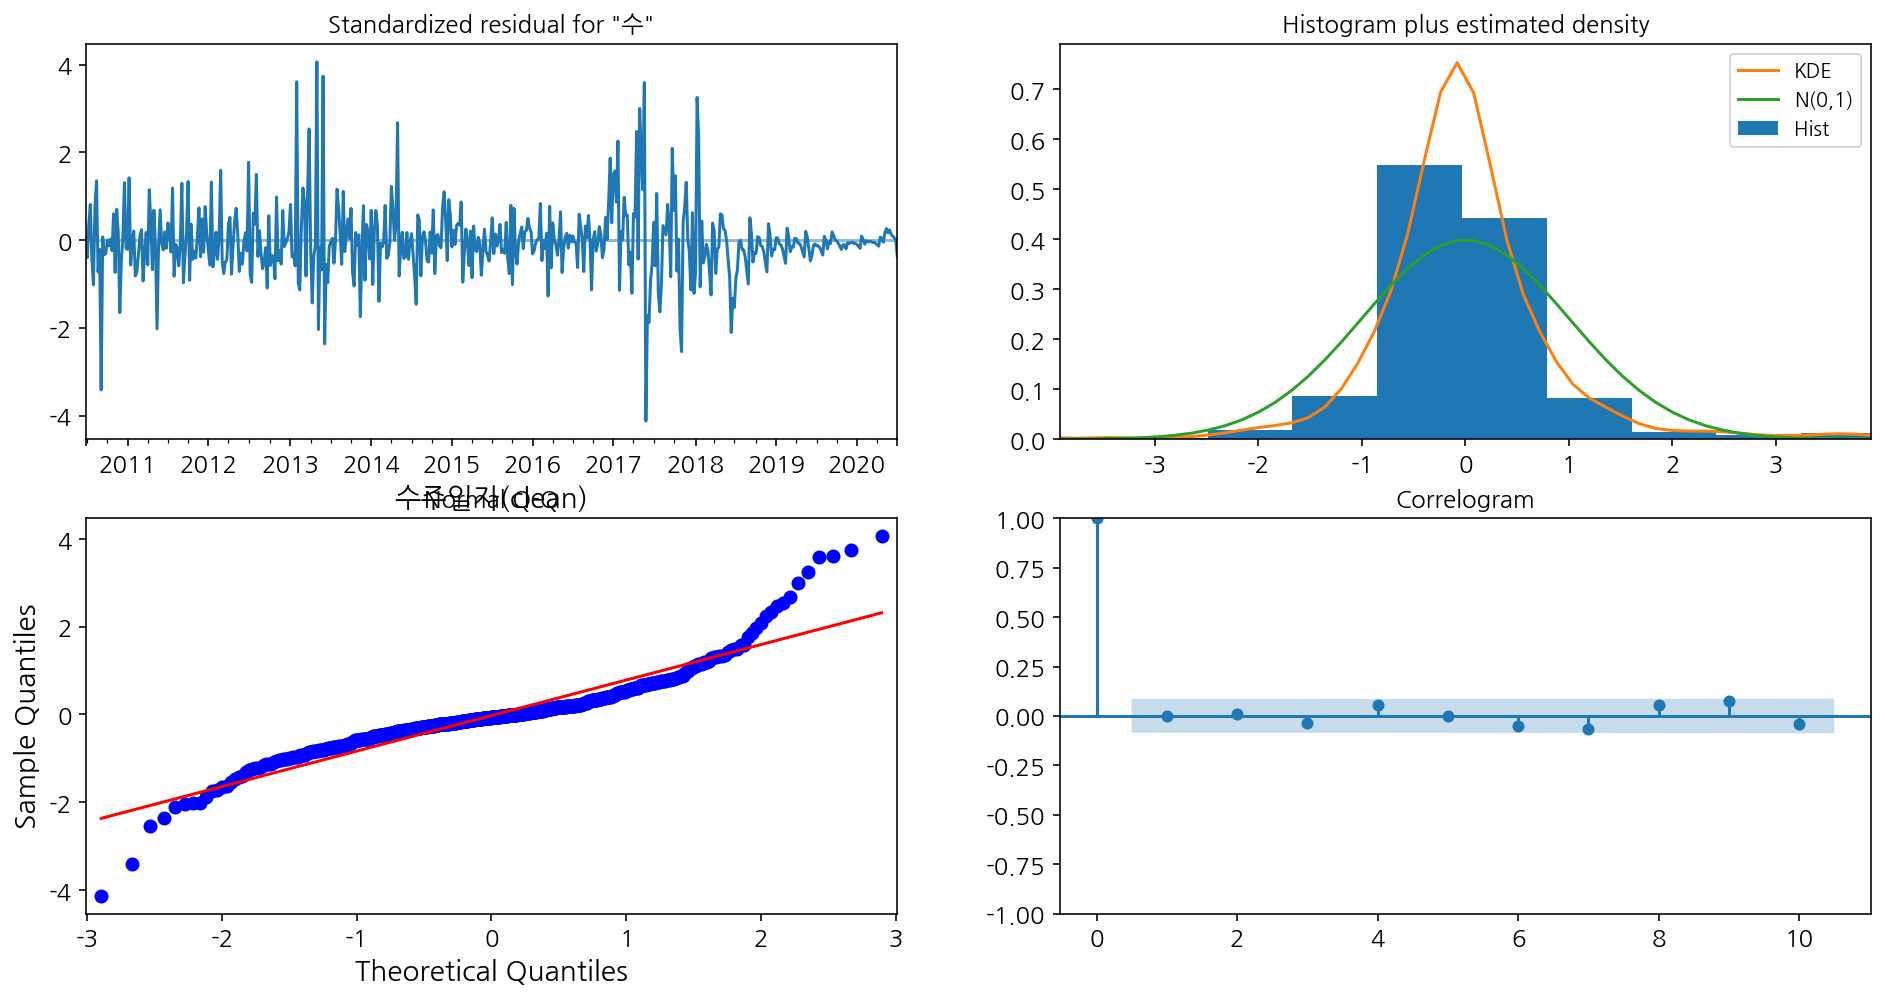

In [65]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [66]:
results.get_prediction()

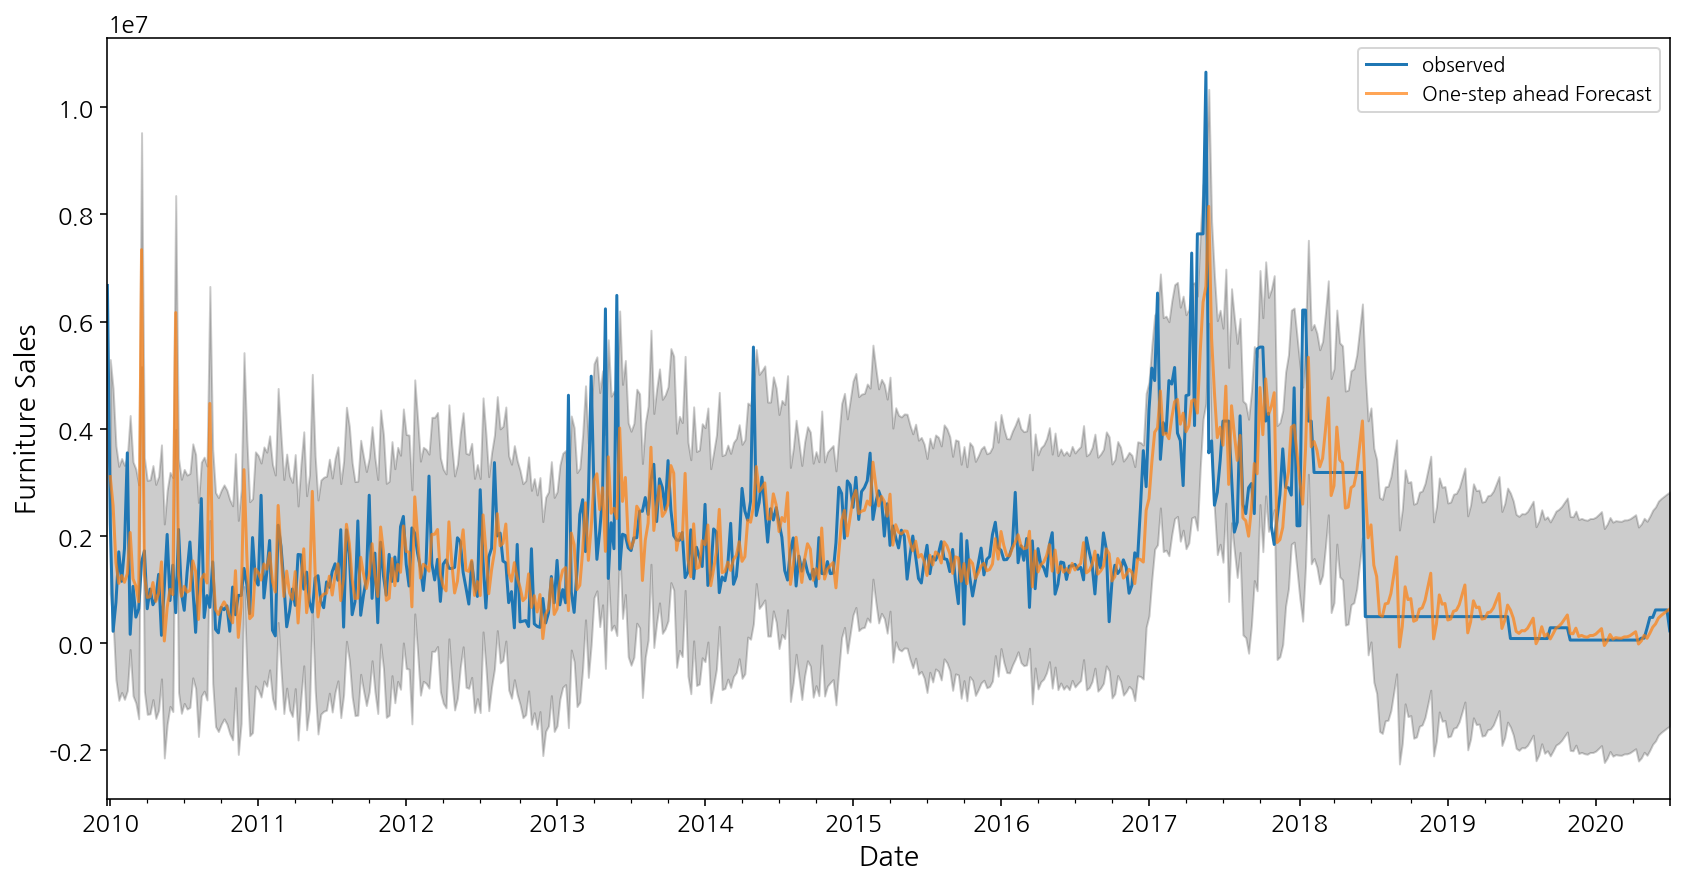

In [67]:
pred = results.get_prediction(start=pd.to_datetime('2010-01-03'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [68]:
y_forecasted = pred.predicted_mean
y_truth = y['2008-10-12':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 938275256629.0


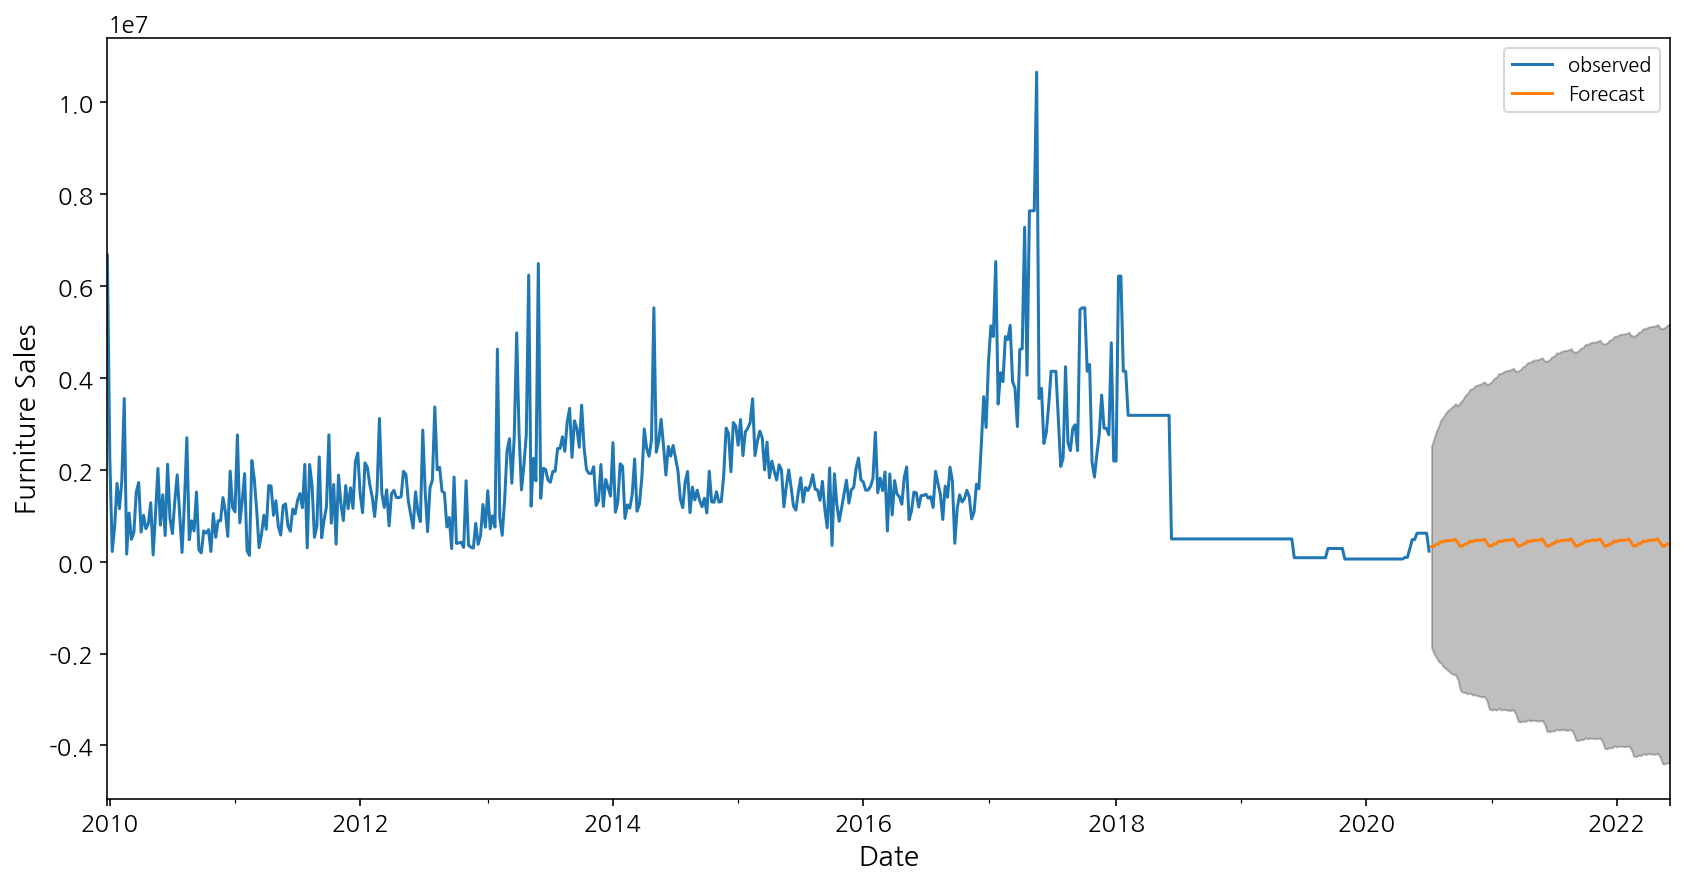

In [69]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [70]:
y_forecasted.tail()

수주일자(clean)
2020-06-07    467959.021849
2020-06-14    518102.977525
2020-06-21    559671.339284
2020-06-28    601382.333696
2020-07-05    637530.887284
Freq: W-SUN, Name: predicted_mean, dtype: float64

    이러한 시계열 예측을 바탕으로, 수주 이전 미리 예측 생산을 통해 정상 납기를 할 수 있다.
    
    이에 따라 보전할 수 있었던, '시아스단호박샐러드'의 납기 미달에 따른 누적손실액을 계산해보면

In [71]:
cum_loss_kg = under_delivery[under_delivery.수주품목코드 == '16A02010']['diff_kg'].sum()
price = df_raw_menu[df_raw_menu.품목코드 == '16A02010']['평균수주단가']

total_loss = cum_loss_kg*price

In [72]:
int(abs(total_loss))

1272844136

    시아스단호박샐러드 단일종목만 해서 지금까지 미달납기에 의해 약 12억 7천 만원의 손실을 입은 것. 이러한 미달납기를 각 품목에 대한 예측 생산을 통해 추후 미달납기를 예방할 수 있다.

# 2. 조업조건 최적화를 통한 불량품 최소화

    제조공정 상 존재하는 IoT 센서 데이터 및 작업장 정보를 통해 불량의 분포를 확인, 이를 바탕으로 최적 조업조건을 찾아 불량을 예방한다.

## 2_1. EDA

In [73]:
df_error = df_raw_error.iloc[:,:12]

In [74]:
df_all = df_raw_cooking.merge(df_raw_error, how='left')

In [75]:
## Error_Message 가 존재하면 불량 / 아니면 양품
def check_error(x):
    if x == True:
        return '양품'
    else:
        return '불량'

In [76]:
df_all.head(10)

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산일자,쿠킹-실링,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,2021-01-03,34.97215,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83,2021-01-03,34.83960,NaN,NaN,NaN,NaN,NaN,NaN
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55,2021-01-03,35.27355,NaN,NaN,NaN,NaN,NaN,NaN
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81,2021-01-03,35.53860,NaN,NaN,NaN,NaN,NaN,NaN
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40,2021-01-03,35.84875,NaN,NaN,NaN,NaN,NaN,NaN
5,4,D004,PET병,13D02142,참깨흑임자드레싱100g,W005,72.674475,108.574475,143.510725,23.291,212.419,71.92,2021-01-03,34.93625,NaN,NaN,NaN,NaN,NaN,NaN
6,5,D004,PET병,13D02142,참깨흑임자드레싱100g,W005,71.725982,86.825982,122.311132,23.657,209.525,72.75,2021-01-03,35.48515,NaN,NaN,NaN,NaN,NaN,NaN
7,6,D004,PET병,13D02142,참깨흑임자드레싱100g,W005,71.017452,102.617452,137.439352,23.215,202.096,71.53,2021-01-03,34.82190,NaN,NaN,NaN,NaN,NaN,NaN
8,8,D004,PET병,13D02142,참깨흑임자드레싱100g,W005,72.035039,101.435039,137.083889,23.766,210.648,76.97,2021-01-03,35.64885,NaN,NaN,NaN,NaN,NaN,NaN
9,9,D004,PET병,13D02080,참깨흑임자드레싱,W005,70.548135,117.148135,153.441785,24.196,214.138,74.47,2021-01-03,36.29365,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_all['Error_Message'] = df_all['Error_Message'].isnull().apply(check_error)

In [78]:
df_model = df_all.copy()

In [79]:
df_model.drop(['품목명'], axis =1 , inplace = True) ## 오류나면 품목명

In [80]:
# SCALE 변수
change = {'양품':0, '불량':1}
df_model["Error_Message"] = df_model["Error_Message"].map(change)

In [81]:
df_model.head()

,순번,생산라인코드,생산라인명,품목코드,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산일자,쿠킹-실링,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
0,3,C001,쿠커 #1,23K01312,W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,2021-01-03,34.97215,NaN,NaN,NaN,NaN,0,NaN
1,1,C002,쿠커 #2,23V00019,W003,70.386480,102.086480,136.926080,23.226,212.043,70.83,2021-01-03,34.83960,NaN,NaN,NaN,NaN,0,NaN
2,13,C003,쿠커 #3,1.#JE+00,W003,71.206130,112.306130,147.579680,23.516,208.781,73.55,2021-01-03,35.27355,NaN,NaN,NaN,NaN,0,NaN
3,7,C005,2동 쿠커 #4,26A01006,W003,70.430565,96.030565,131.569165,23.692,208.269,74.81,2021-01-03,35.53860,NaN,NaN,NaN,NaN,0,NaN
4,2,C007,프리머 #1,26B06024,W003,72.179319,114.079318,149.928068,23.899,211.625,73.40,2021-01-03,35.84875,NaN,NaN,NaN,NaN,0,NaN


In [82]:
df_model = df_model[['작업장코드','쿠킹온도','쿠킹스팀압력','쿠킹-실링','충전실온도','실링온도','실링압력', 'Error_Message']]

In [83]:
df_model

,작업장코드,쿠킹온도,쿠킹스팀압력,쿠킹-실링,충전실온도,실링온도,실링압력,Error_Message
0,W003,131.742003,23.315,34.97215,71.669853,96.769853,201.844,0
1,W003,136.926080,23.226,34.83960,70.386480,102.086480,212.043,0
2,W003,147.579680,23.516,35.27355,71.206130,112.306130,208.781,0
3,W003,131.569165,23.692,35.53860,70.430565,96.030565,208.269,0
4,W003,149.928068,23.899,35.84875,72.179319,114.079318,211.625,0
...,...,...,...,...,...,...,...,...
23994,W005,138.257466,23.031,34.54685,70.610616,103.710616,199.343,1
23995,W005,133.916831,23.656,35.48445,69.732381,98.432381,213.413,0
23996,W005,143.598182,24.026,36.03825,71.459932,107.559932,215.243,0
23997,W005,100.773102,23.339,35.00865,70.664452,65.764452,209.513,0


<AxesSubplot:xlabel='Error_Message', ylabel='실링압력'>

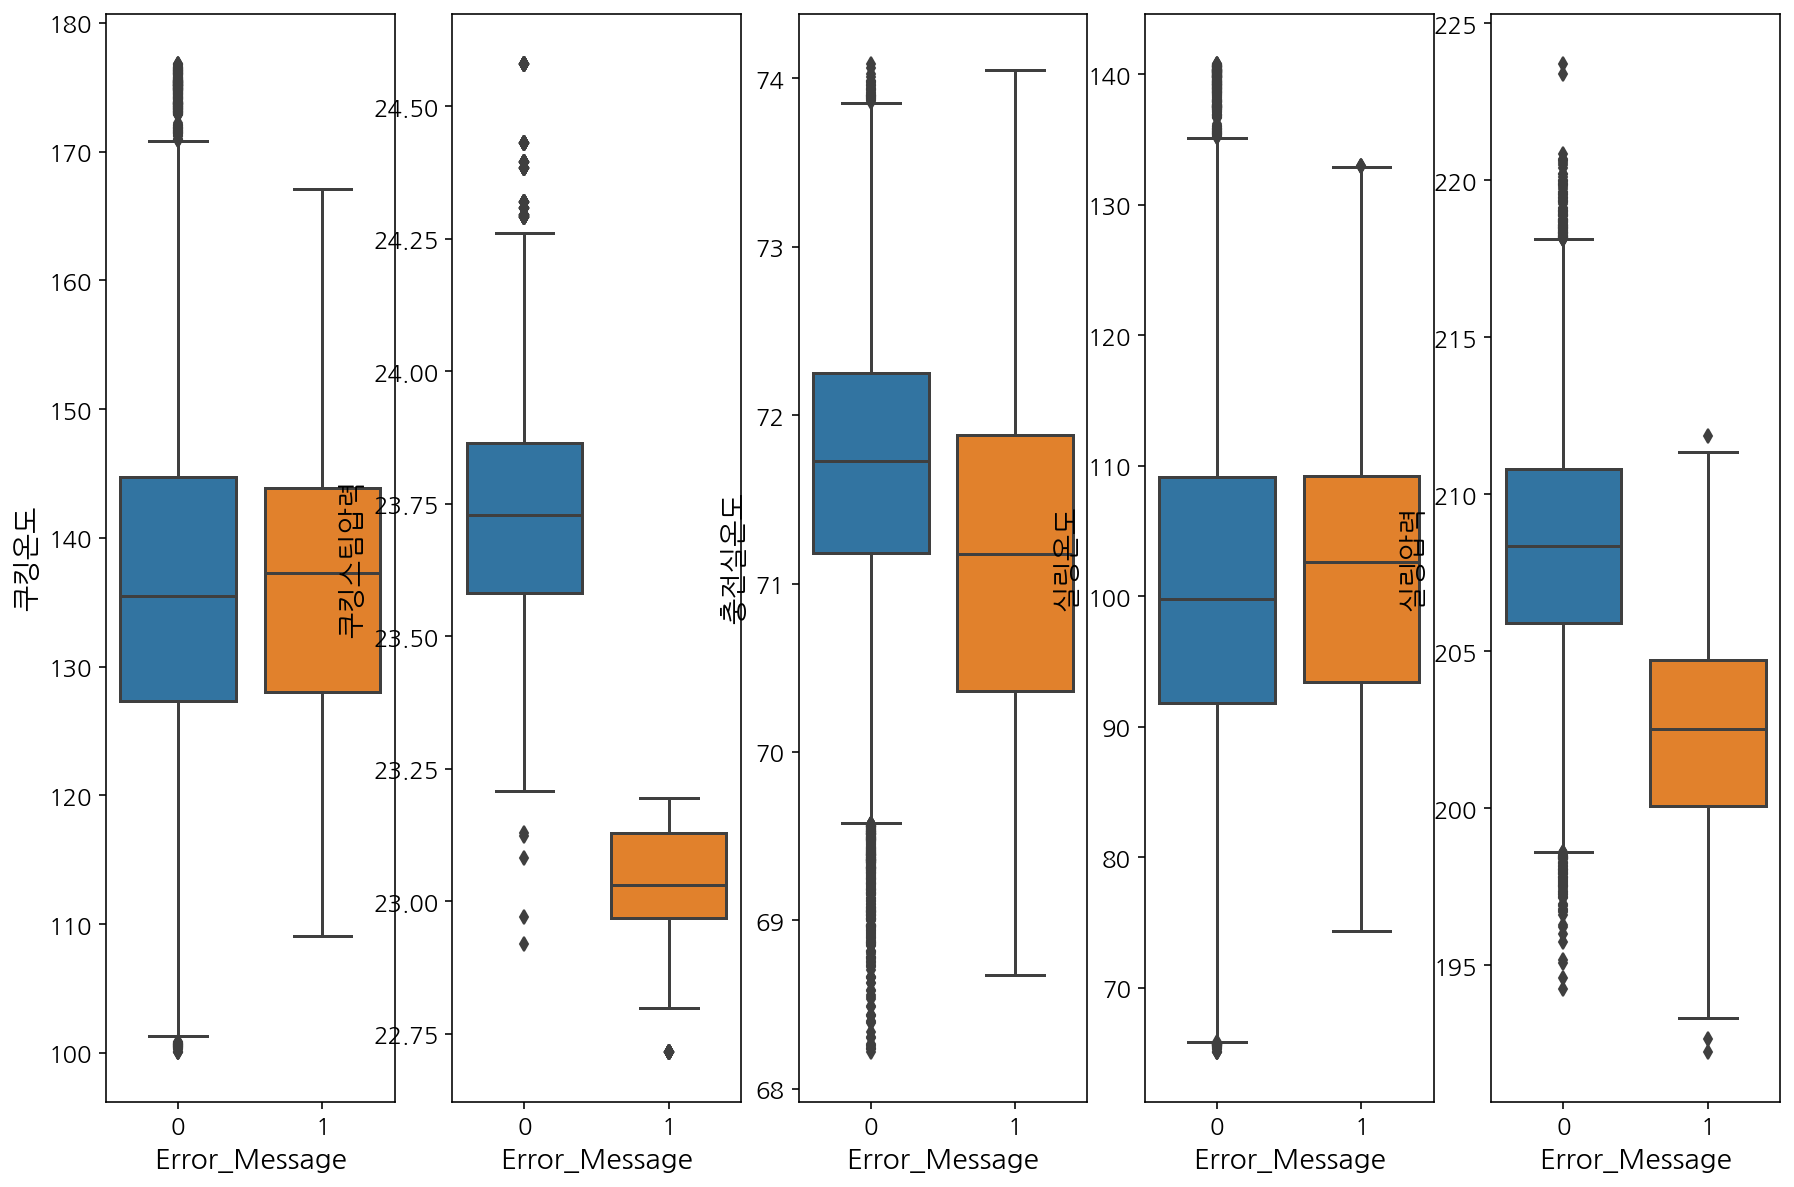

In [84]:
fig, ax = plt.subplots(ncols=5)
sns.boxplot(data=df_model, x='Error_Message', y='쿠킹온도', ax=ax[0])
sns.boxplot(data=df_model, x='Error_Message', y='쿠킹스팀압력', ax=ax[1])
sns.boxplot(data=df_model, x='Error_Message', y='충전실온도', ax=ax[2])
sns.boxplot(data=df_model, x='Error_Message', y='실링온도', ax=ax[3])
sns.boxplot(data=df_model, x='Error_Message', y='실링압력', ax=ax[4])

    쿠킹온도와 실링온도는 불량과 양품의 차이가 없어보이나, 쿠킹스팀압력, 실링압력은 그 차이가 뚜렷해보인다.
    보다 객관적으로 각 IoT 센서값이 양품/불량에 대해 객관적으로 차이가 존재하는지 통계적 검증을 진행해보도록 하자.

In [85]:
stats.normaltest(df_model['쿠킹스팀압력'])

NormaltestResult(statistic=820.1667376037755, pvalue=7.999370443705303e-179)

In [86]:
stats.normaltest(df_model['충전실온도'])

NormaltestResult(statistic=635.8938095305344, pvalue=8.268252335650389e-139)

In [87]:
stats.normaltest(df_model['실링압력']) 

NormaltestResult(statistic=44.48324517750429, pvalue=2.1907158031731145e-10)

    모두 p-value가 매우 낮다. 즉 매우 높은 신뢰도로 위 센서데이터의 분포는 정규분포를 따르지 않는다. (귀무가설: 해당 데이터는 정규분포를 따른다 -> 기각) 
    

<AxesSubplot:xlabel='Error_Message', ylabel='쿠킹온도'>

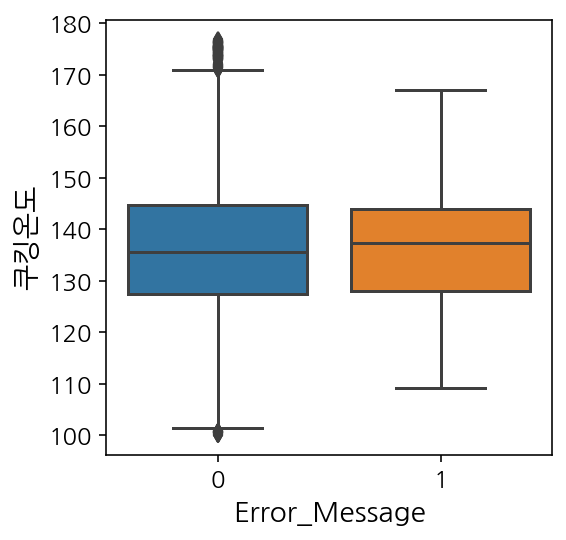

In [88]:
plt.figure(figsize=[4,4])
sns.boxplot(data=df_model, x='Error_Message', y='쿠킹온도')
# df_model.boxplot(column='쿠킹온도', by = ['Error_Message'])

<AxesSubplot:xlabel='Error_Message', ylabel='쿠킹스팀압력'>

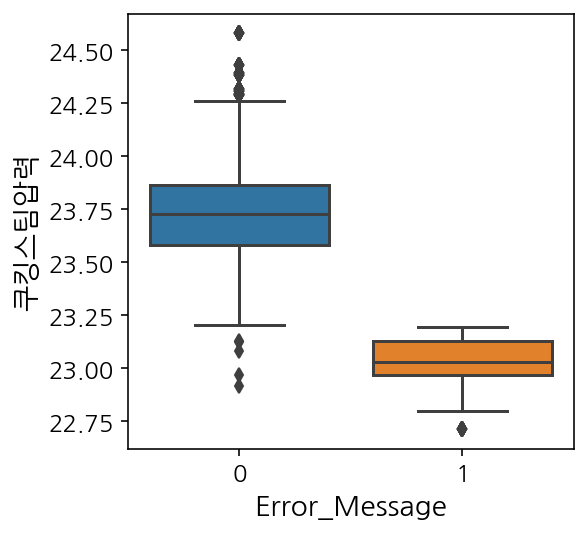

In [89]:
plt.figure(figsize=[4,4])
sns.boxplot(data=df_model, x='Error_Message', y='쿠킹스팀압력')
#df_model.boxplot(column='쿠킹스팀압력', by = ['Error_Message'])

<AxesSubplot:xlabel='Error_Message', ylabel='쿠킹-실링'>

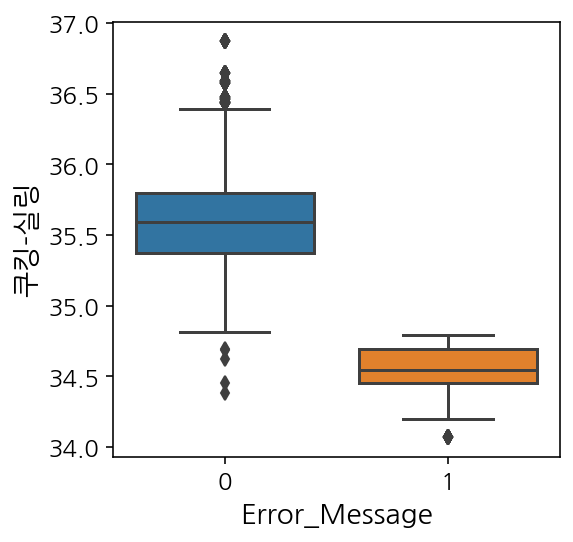

In [90]:
plt.figure(figsize=[4,4])
sns.boxplot(data=df_model, x='Error_Message', y='쿠킹-실링')
#df_model.boxplot(column='쿠킹-실링', by = ['Error_Message'])

<AxesSubplot:xlabel='Error_Message', ylabel='충전실온도'>

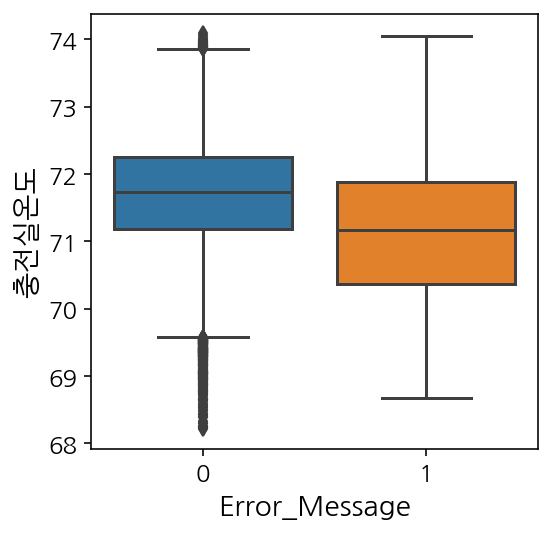

In [91]:
plt.figure(figsize=[4,4])
sns.boxplot(data=df_model, x='Error_Message', y='충전실온도')
# df_model.boxplot(column='충전실온도', by = ['Error_Message'])

<AxesSubplot:xlabel='Error_Message', ylabel='실링온도'>

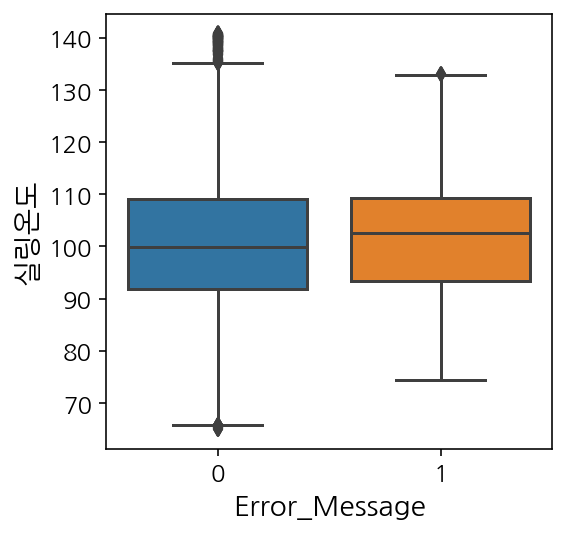

In [92]:
plt.figure(figsize=[4,4])
sns.boxplot(data=df_model, x='Error_Message', y='실링온도')
# df_model.boxplot(column='실링온도', by = ['Error_Message'])

<AxesSubplot:xlabel='Error_Message', ylabel='실링압력'>

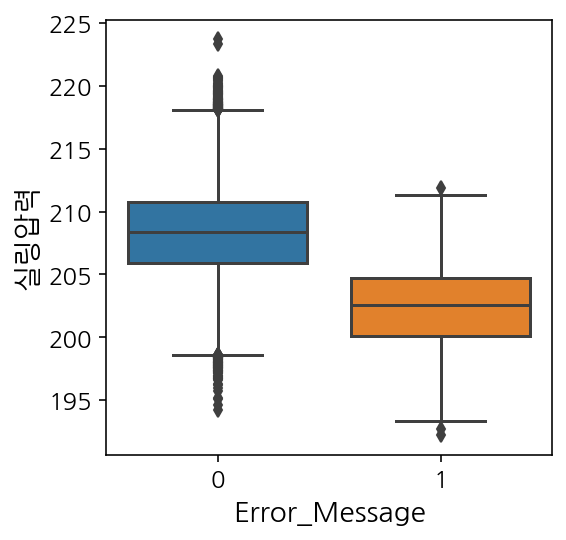

In [93]:
plt.figure(figsize=[4,4])
sns.boxplot(data=df_model, x='Error_Message', y='실링압력')
# df_model.boxplot(column='쿠킹온도', by = ['Error_Message'])

    - 앞서 확인한 연속형 인자가 모두 비정규 분포 -> 범주형 VS 연속형 집단 간 평균 비교에서, wilcoxon Test로 검정 

In [94]:
cond1 = (df_model['Error_Message']==1)

df_model_target = df_model.loc[cond1]
df_model_non_target = df_model.loc[~cond1]

In [95]:
# 귀무가설 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 것이다. 
stats.ranksums(df_model_target['실링압력'], df_model_non_target['실링압력'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 실링 압력의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=-42.82539261438267, pvalue=0.0)

In [96]:
# 귀무가설 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 것이다. 
stats.ranksums(df_model_target['쿠킹스팀압력'], df_model_non_target['쿠킹스팀압력'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 쿠킹스팀압력의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=-55.3907835098293, pvalue=0.0)

In [97]:
# 귀무가설 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 없을 것이다. 
# 대립가설 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 것이다. 
stats.ranksums(df_model_target['충전실온도'], df_model_non_target['충전실온도'])
# P.value <0.05 
# 통계적 결론 : 대립가설 참 
# 사실적 결론 : 제품 불량 여부에 따른 충전실온도의 평균의 차이가 있을 것이다. 

RanksumsResult(statistic=-18.265031793347866, pvalue=1.5712139853812259e-74)

    육안으로 명확히 구분되던 세 인자 모두 윅콕슨 테스트에 의해 통계적으로도 "불량 여부에 따라 평균의 차이가 존재한다".

    이러한 값들을 바탕으로 관리 상한과 관리 하한을 설정한 관리도를 그려보자.

In [ ]:
df_error.fillna('nothing', inplace= True)

In [ ]:
len(df_error)

In [ ]:
rice_error = df_error[df_error.품목명.str.contains('밥')]
len(rice_error)

In [ ]:
sauce_error = df_error[df_error.품목명.str.contains('소스')]

In [ ]:
len(rice_error)/len(df_error)

In [ ]:
len(sauce_error)

In [ ]:
df2['ID'] = df2['생산일자'] + df2['품목코드'] + df2['생산라인코드'] + df2['순번'].astype(str)
df3['ID'] = df3['생산일자'] + df3['품목코드'] + df3['생산라인코드'] + df3['순번'].astype(str)

In [ ]:
df2_1 = df2.drop(columns=['순번', '생산라인코드', '생산라인명', '생산일자','품목코드', '작업장코드','품목명'])

In [ ]:
df_error = pd.merge(df3, df2_1, how='left', on='ID')
df_error.head(3)

In [ ]:
df_error['불량수'] = 1 

In [105]:
df_error_product = df_error.pivot_table(index='품목명',values='불량수',aggfunc='sum').reset_index()
df_error_product.sort_values(by='불량수',ascending=False).head(10)

KeyError: '불량수'

In [99]:
# SCALE 변수
change = {'양품':0, '불량':1}
df_all["Error_Message"] = df_all["Error_Message"].map(change)

In [100]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_model)

# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("Error_Message", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["Error_Message"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (23999, 11)
분할 후 설명변수 데이터 :Train (16799, 11)   Test (7200, 11)


In [101]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    16065
1      734
Name: Error_Message, dtype: int64 

Over-Sampling 후 Train X: (32130, 11)
Over-Sampling 후 Train Y: (32130,) 

Over-Sampling 후 '1':16065
Over-Sampling 후 '0':16065


In [106]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234 )
tree_uncustomized.fit(x_resampled, y_resampled)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(x_resampled, y_resampled)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [111]:
# 변수명 저장
v_feature_name = df_train_x.columns

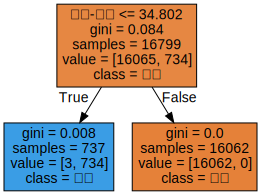

In [113]:
# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth = 1, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["양품", "불량"], # 목표변수 값이 숫자-> Label 직접 지정
                # class_names = tree_low.classes_,원래 목표변수 값이 법주형 -> 모델 keyword 사용           
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

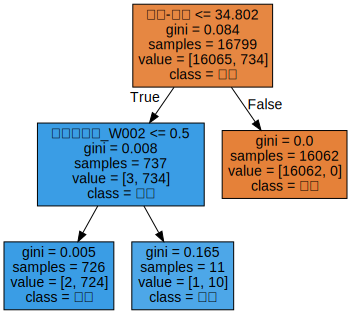

In [112]:
# 깊이가 2인 모델
tree_low = DecisionTreeClassifier(max_depth = 2, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["양품", "불량"], # 목표변수 값이 숫자-> Label 직접 지정
                # class_names = tree_low.classes_,원래 목표변수 값이 법주형 -> 모델 keyword 사용           
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

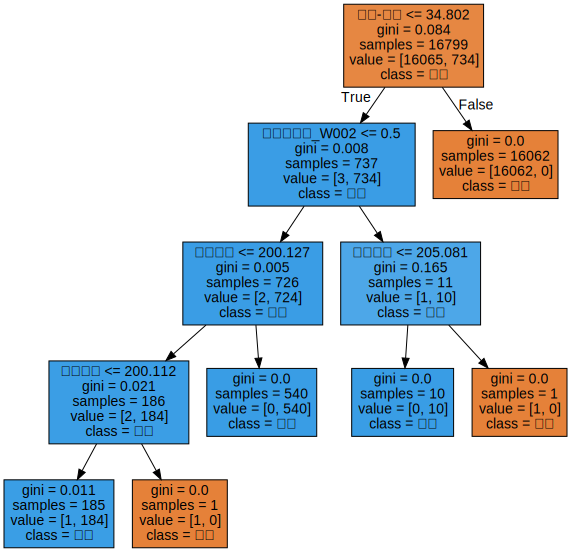

In [109]:
# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth = 4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["양품", "불량"], # 목표변수 값이 숫자-> Label 직접 지정
                # class_names = tree_low.classes_,원래 목표변수 값이 법주형 -> 모델 keyword 사용           
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 3. 불량 집계 및 모니터링 시스템 제작: input 데이터셋

In [ ]:
df_normal = df_normal[df_normal['Error_Message'] == 1]

In [ ]:
df_normal.head()

In [ ]:
df_error = df_model[['충전실온도','실링온도', '쿠킹온도','쿠킹스팀압력','실링압력', 'Error_Message']]
df_error = df_error[df_error['Error_Message'] == 0]
df_error.head()

In [ ]:
df_normal_sample = df_normal.sample(n=800, replace=False)

df_error_sample = df_error.sample(n= 200, replace=False)


In [ ]:
df_error_sample.head()

In [ ]:
df_normal_error_random_sampling = pd.concat([df_normal_sample, df_error_sample], ignore_index= True)

In [ ]:
len(df_normal_error_random_sampling)

In [ ]:
df_normal_error_random_sampling.head(5)

In [ ]:
import sklearn
df_normal_error_random_sampling=sklearn.utils.shuffle(df_normal_error_random_sampling)
df_normal_error_random_sampling.head(5)

In [ ]:
df_normal_error_random_sampling.to_csv('불량모니터링시스템테스트데이터셋.csv')